# <font color='purple'>Preprocessing QC statistics </font> 
## Noam, July 2023


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
MOMAPS_HOME = '/home/labs/hornsteinlab/Collaboration/MOmaps_Noam/MOmaps'
MOMAPS_DATA_HOME = '/home/labs/hornsteinlab/Collaboration/MOmaps'
LOGS_PATH = os.path.join(MOMAPS_HOME, 'outputs','preprocessing','spd','logs', 'microglia_LPS')
PLOT_PATH = os.path.join(MOMAPS_HOME, 'src', 'preprocessing', 'notebooks','figures','microglia_LPS')
os.chdir(MOMAPS_HOME)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", font_scale=1.5)
sns.color_palette("husl", 8)
plt.rcParams["image.cmap"] = "Set1"
from tqdm.notebook import tqdm
from src.common.lib.preprocessing_utils import rescale_intensity
from src.common.lib.images_qc import *
#sys.path.insert(1, "/home/labs/hornsteinlab/Collaboration/MOmaps_Sagy/MOmaps/src/common/lib")
import contextlib
import io
import matplotlib
import warnings
warnings.filterwarnings('ignore', category=pd.core.common.SettingWithCopyWarning)
from src.common.lib.qc_config_tmp import *


In [4]:
df = log_files_qc(LOGS_PATH)


Total of 2 files were read.
Before dup handeling  (44000, 20)
After duplication removal #1: (44000, 21)
After duplication removal #2: (44000, 21)


## validate folder structure and files existence

In [4]:
# choose batches
batches = [f'batch{i}' for i in range (1,3)]
batches

['batch1', 'batch2']

### Raw Files

batch1
Folder structure is valid.
All files exists.
Total Sites:  72000


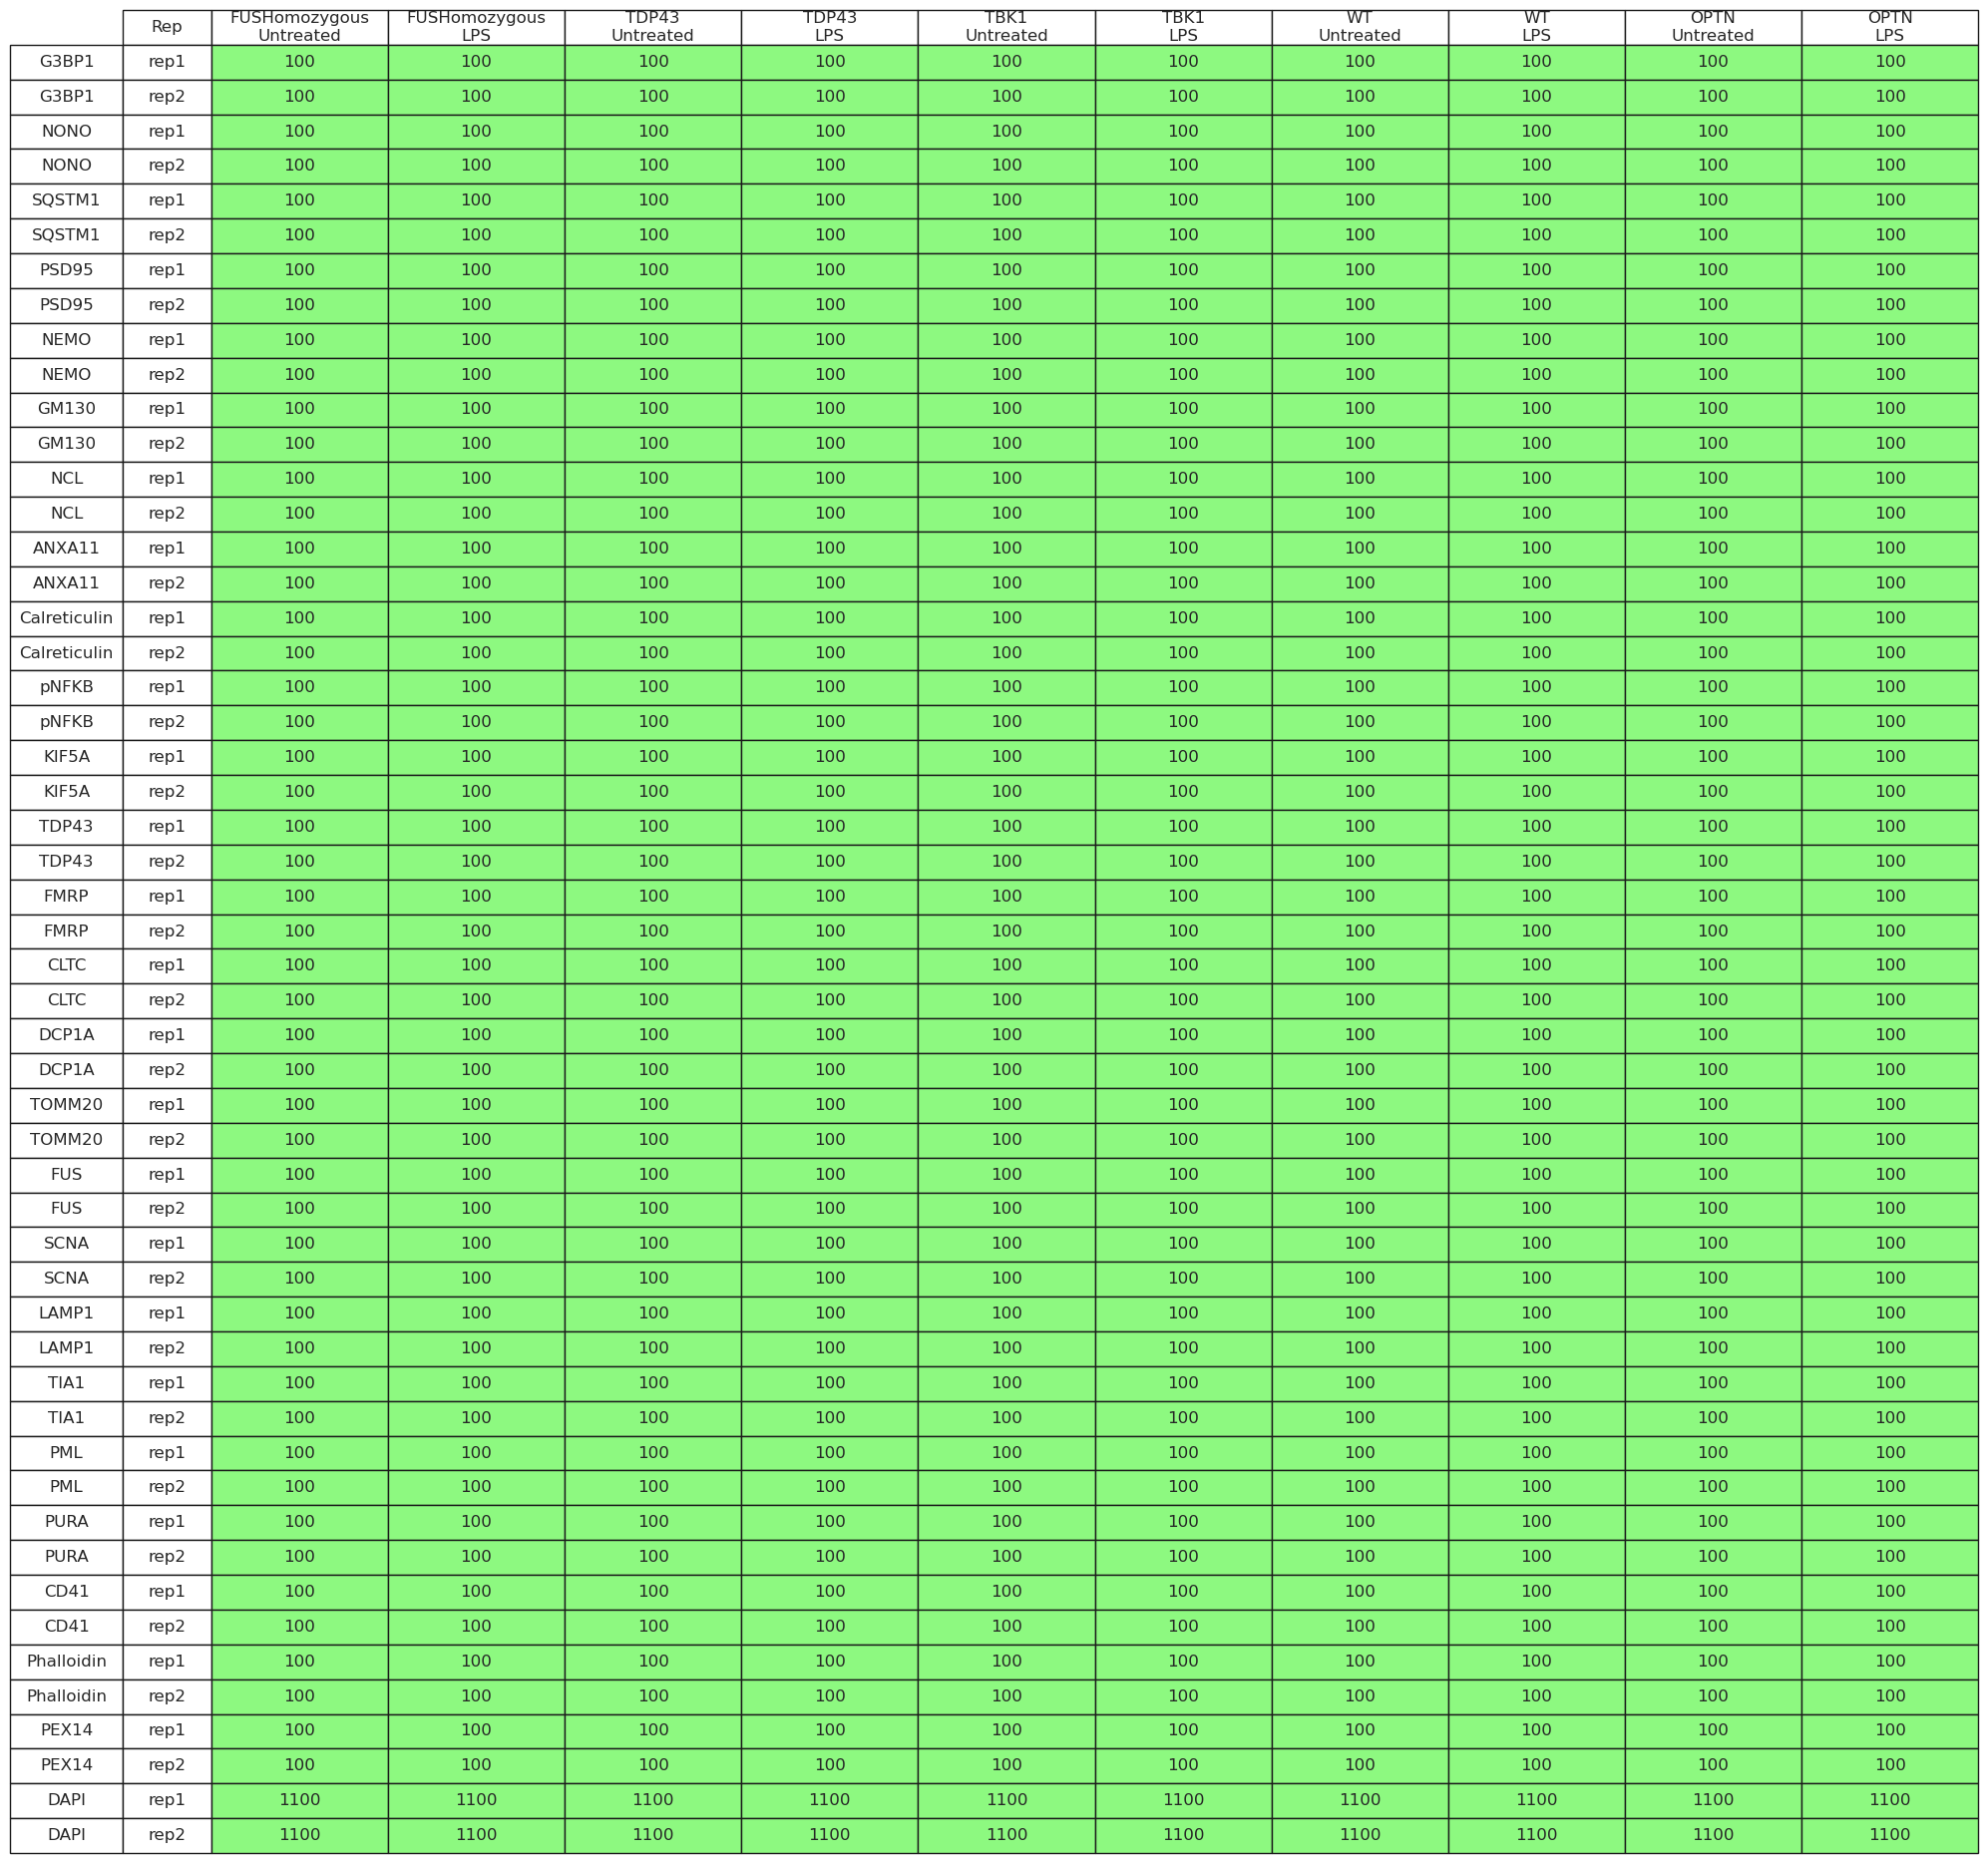

batch2
Folder structure is valid.
All files exists.
Total Sites:  72000


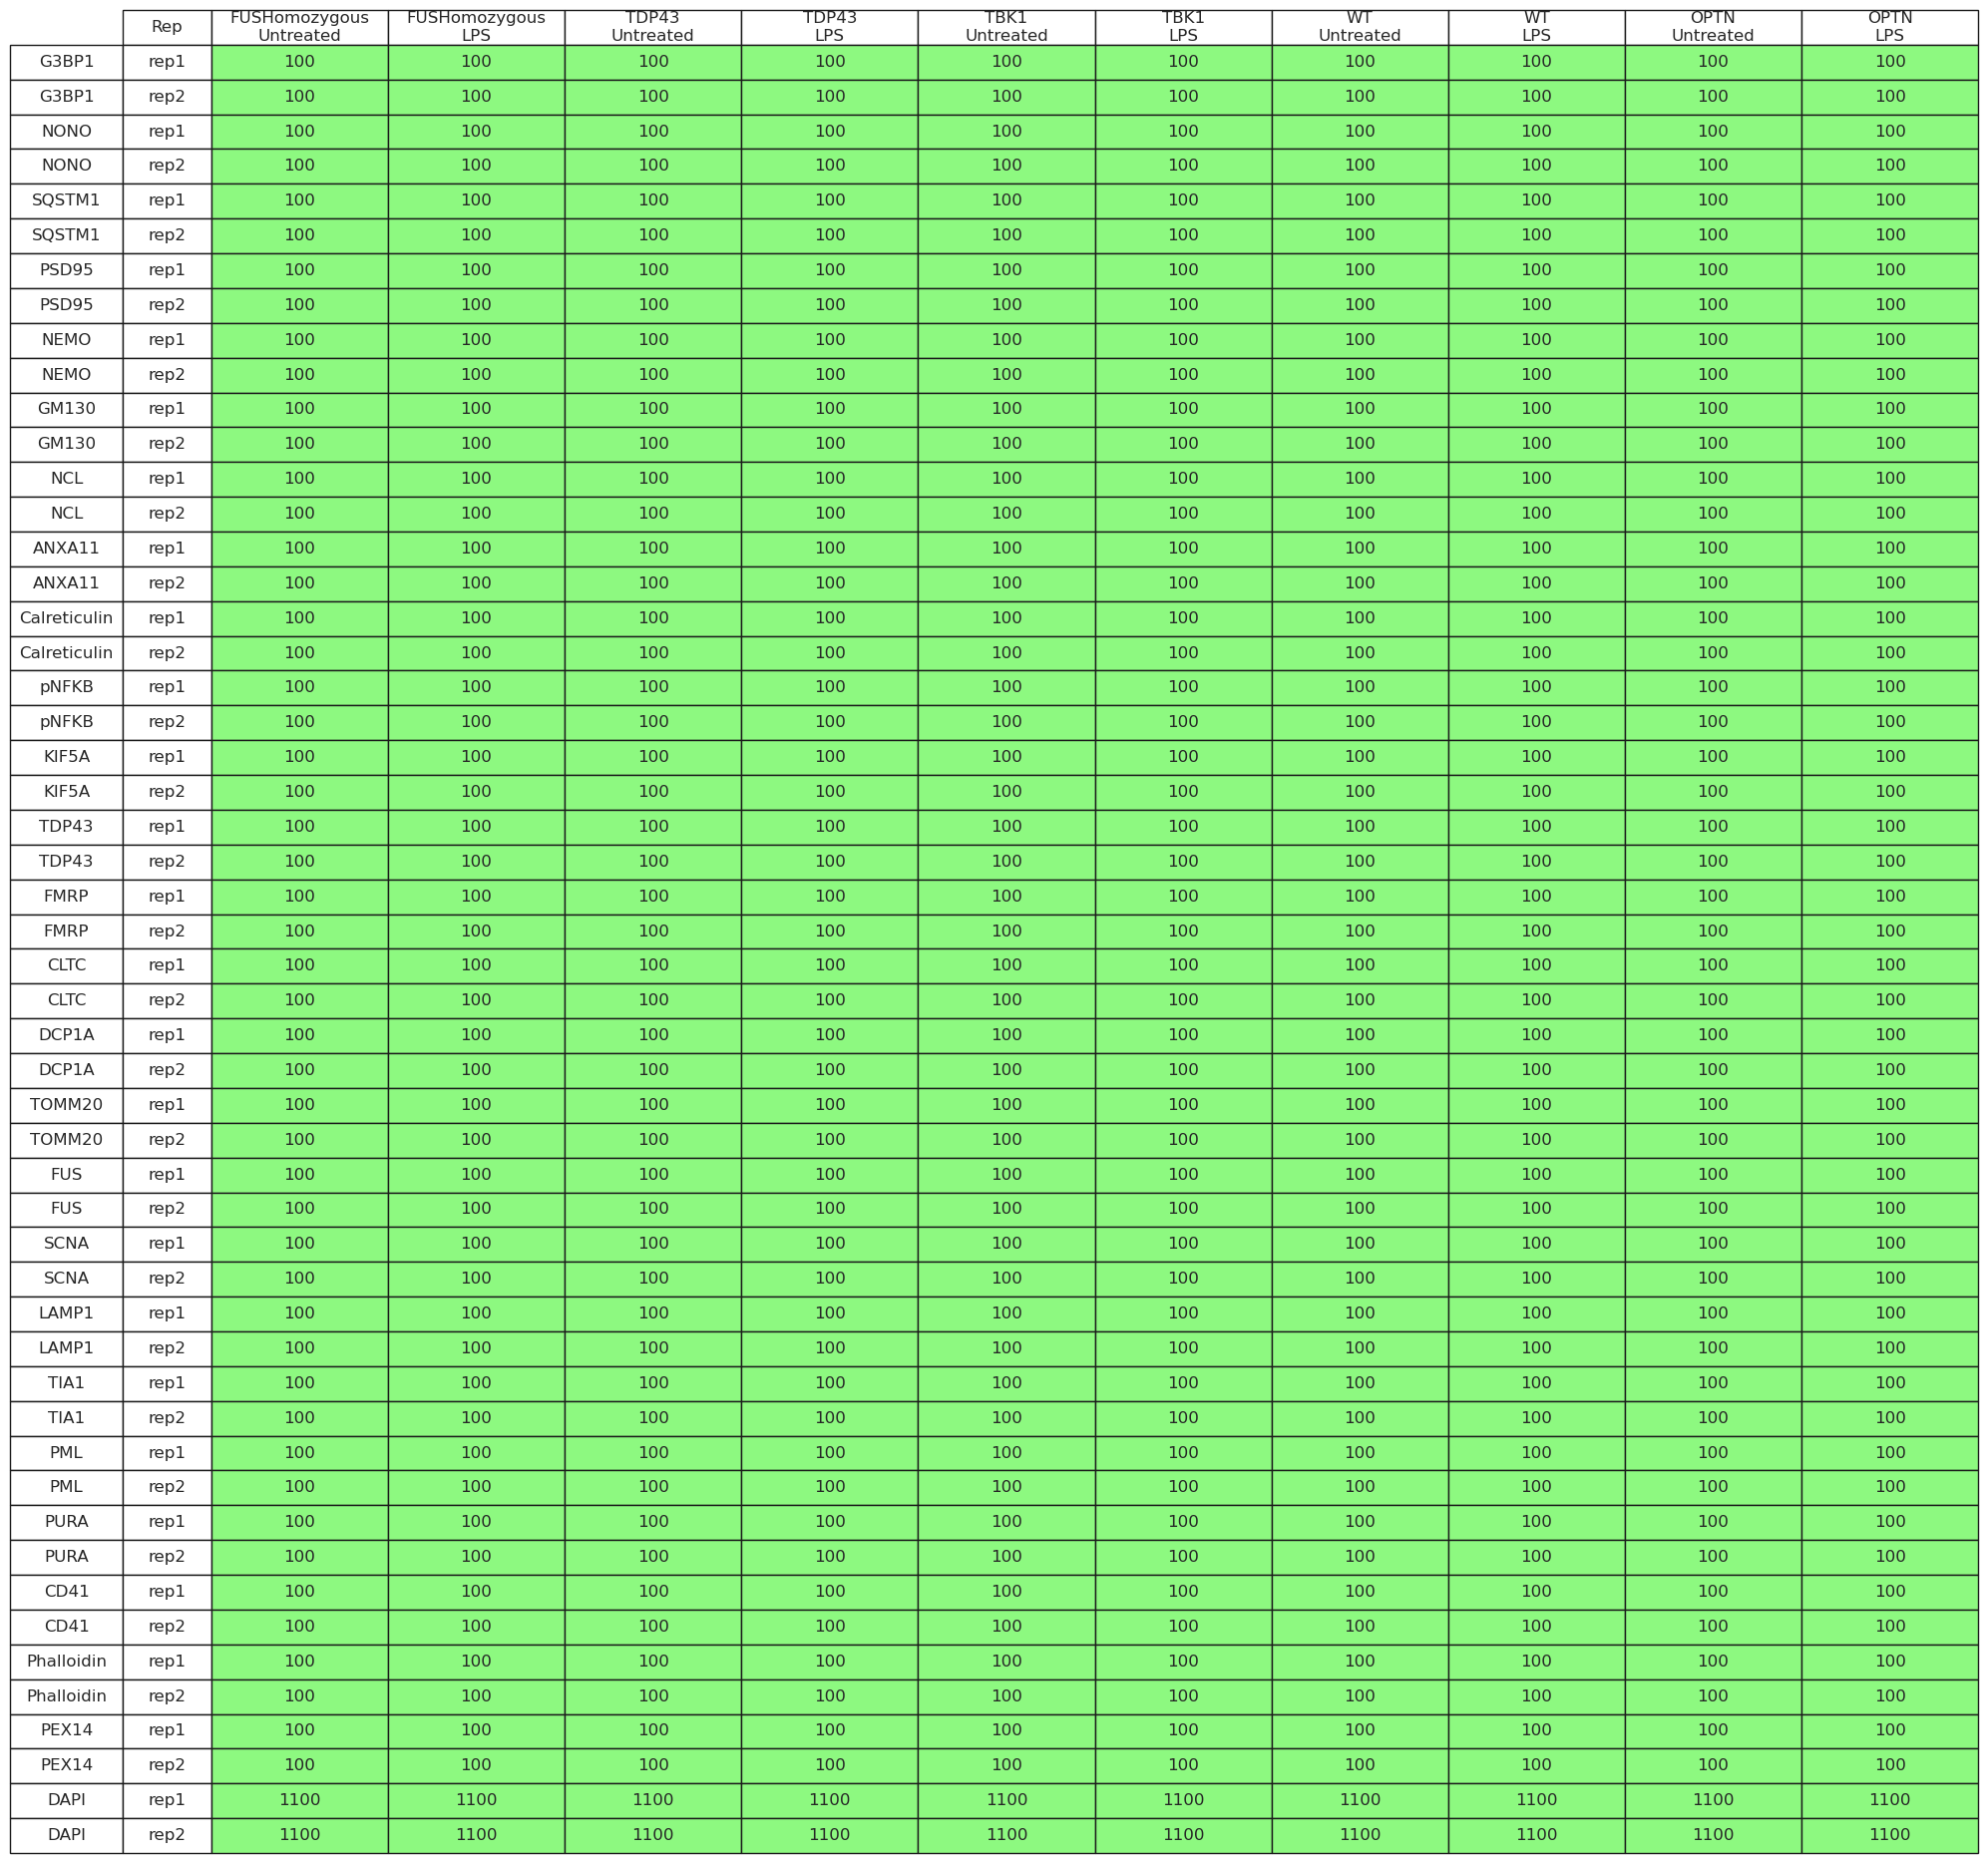

In [5]:

root_directory_raw = os.path.join(MOMAPS_DATA_HOME, 'input', 'images', 'raw', 
                                  'SpinningDisk','microglia_LPS_sort')

raws = run_validate_folder_structure(root_directory_raw, False, microglia_LPS_panels, 
                                     microglia_LPS_markers,
                                     PLOT_PATH,microglia_LPS_marker_info,
                                    microglia_LPS_cell_lines_to_cond, reps, 
                                     microglia_LPS_cell_lines_for_disp, expected_dapi_raw,
                                     batches=batches)

### Processed

batch1
Folder structure is valid.
All files exists.
Total Sites:  14638


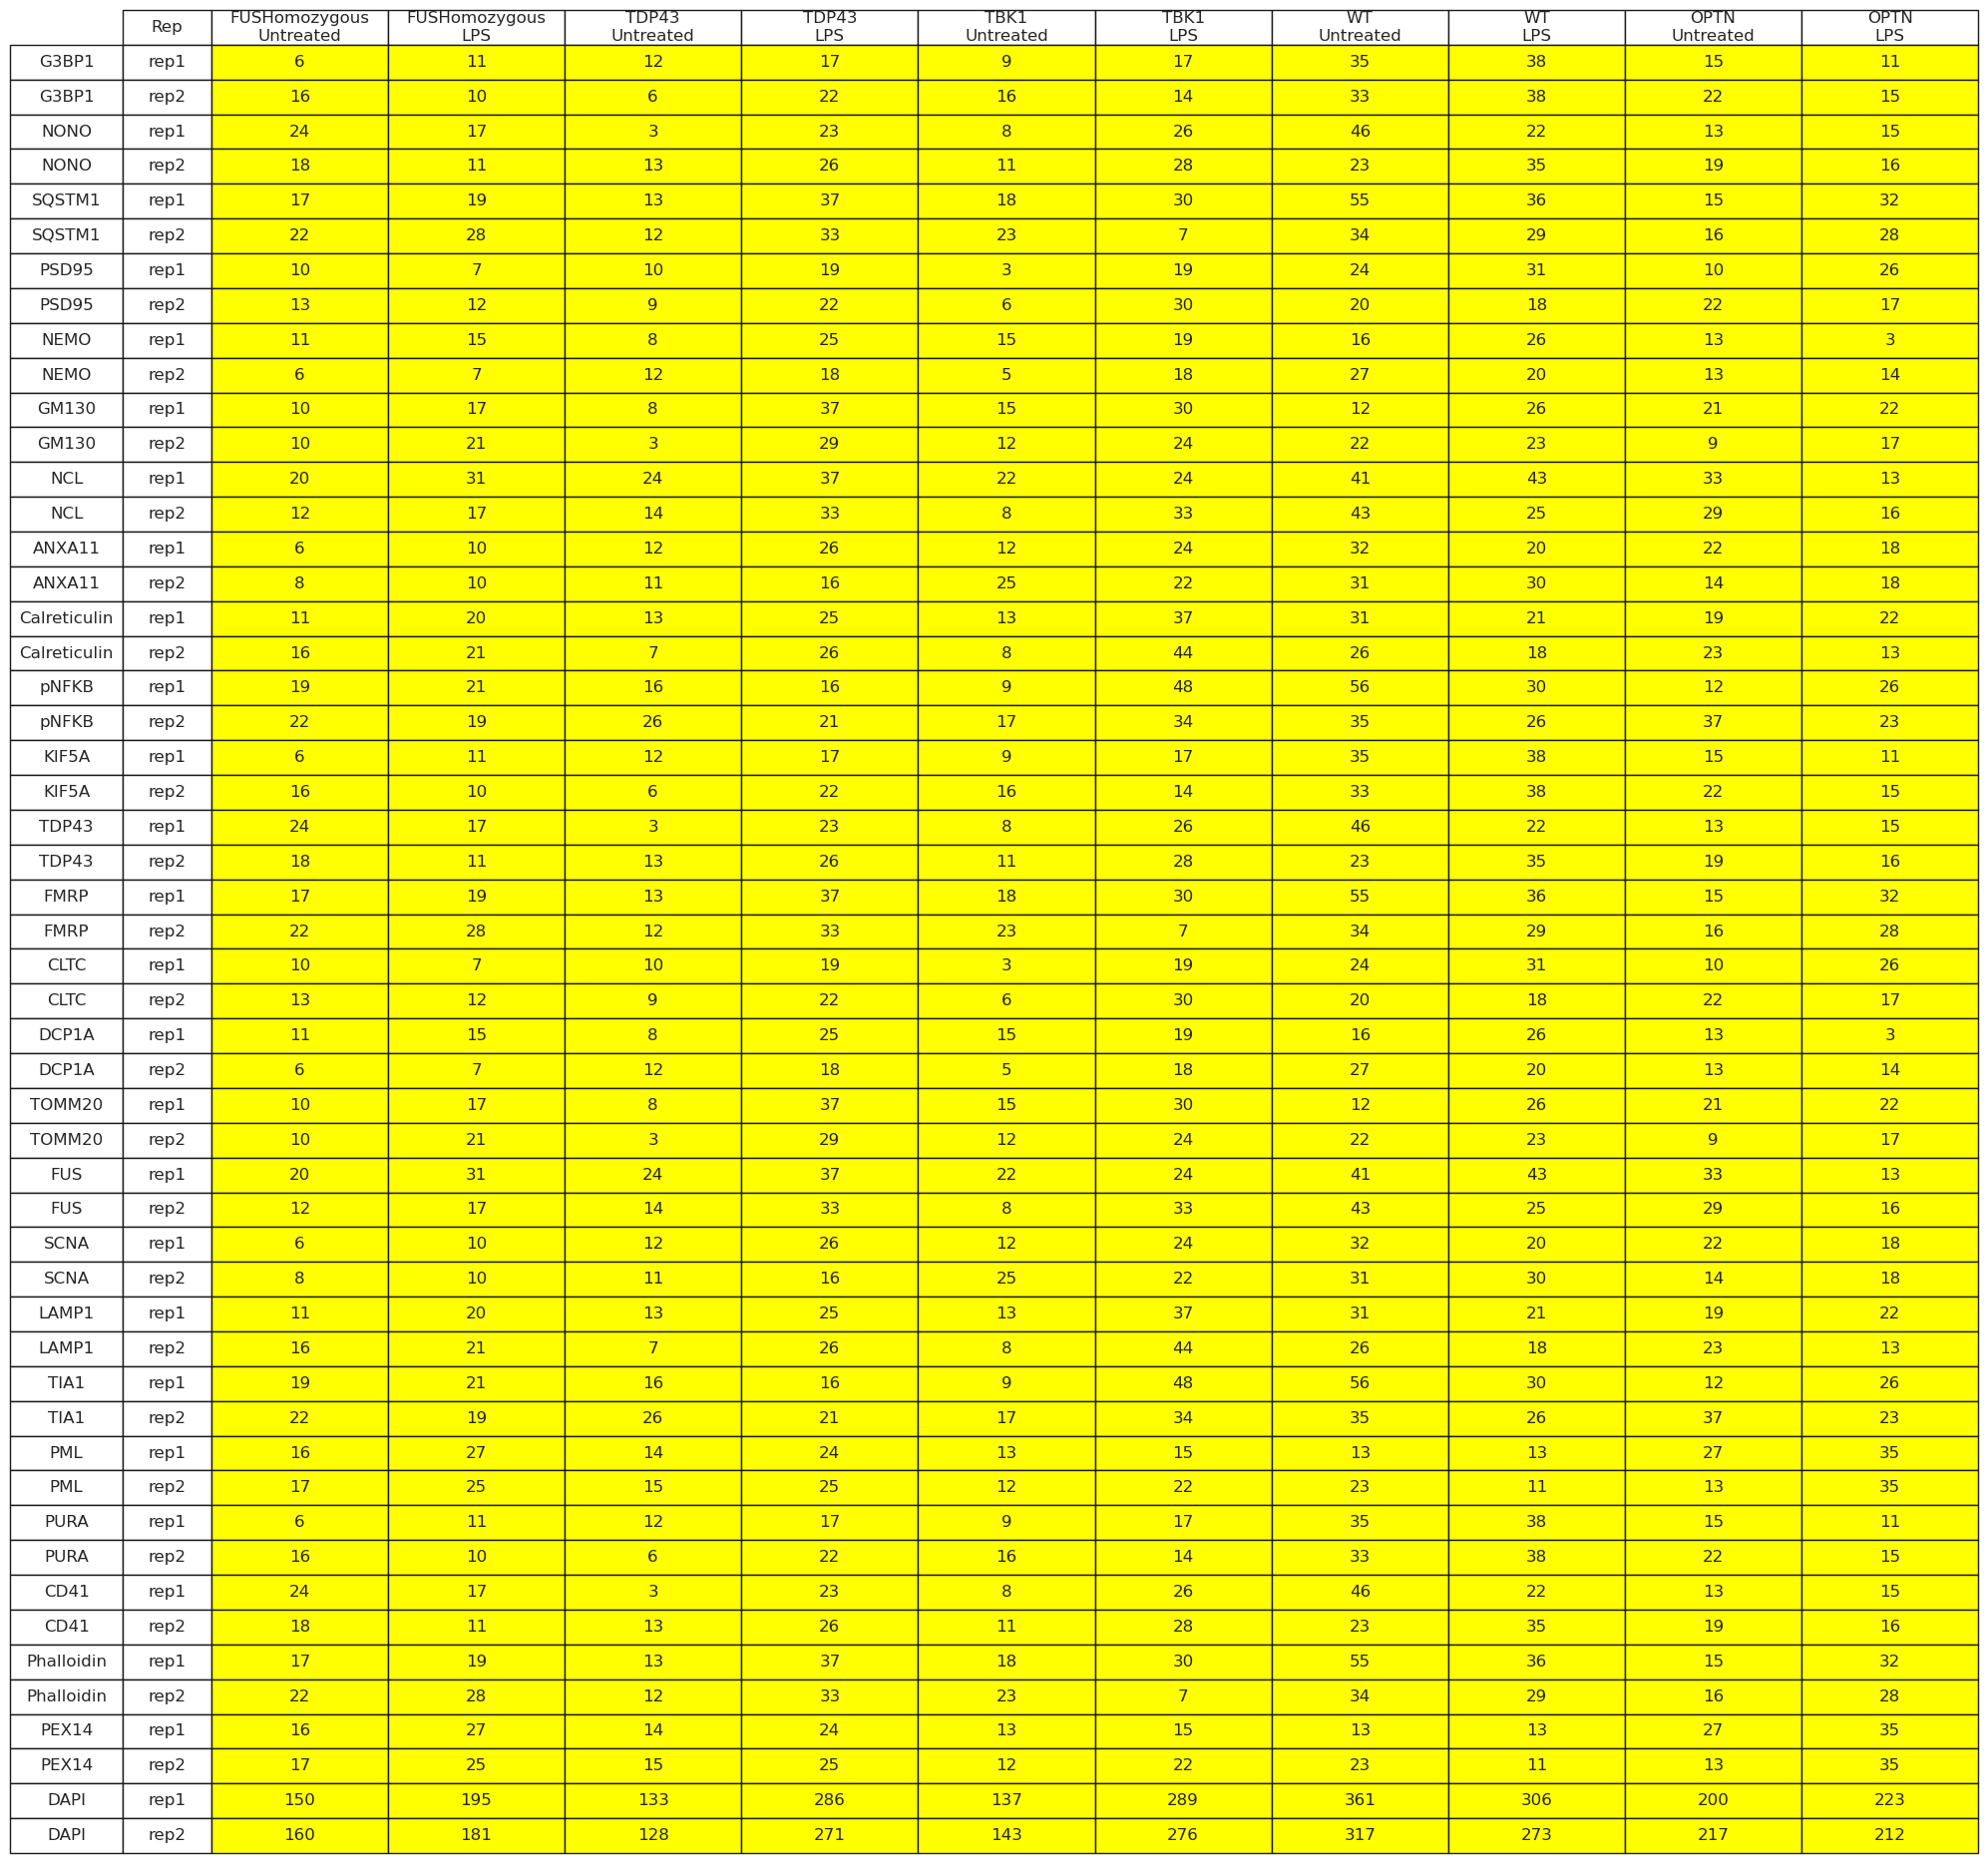

batch2
Folder structure is valid.
All files exists.
Total Sites:  14475


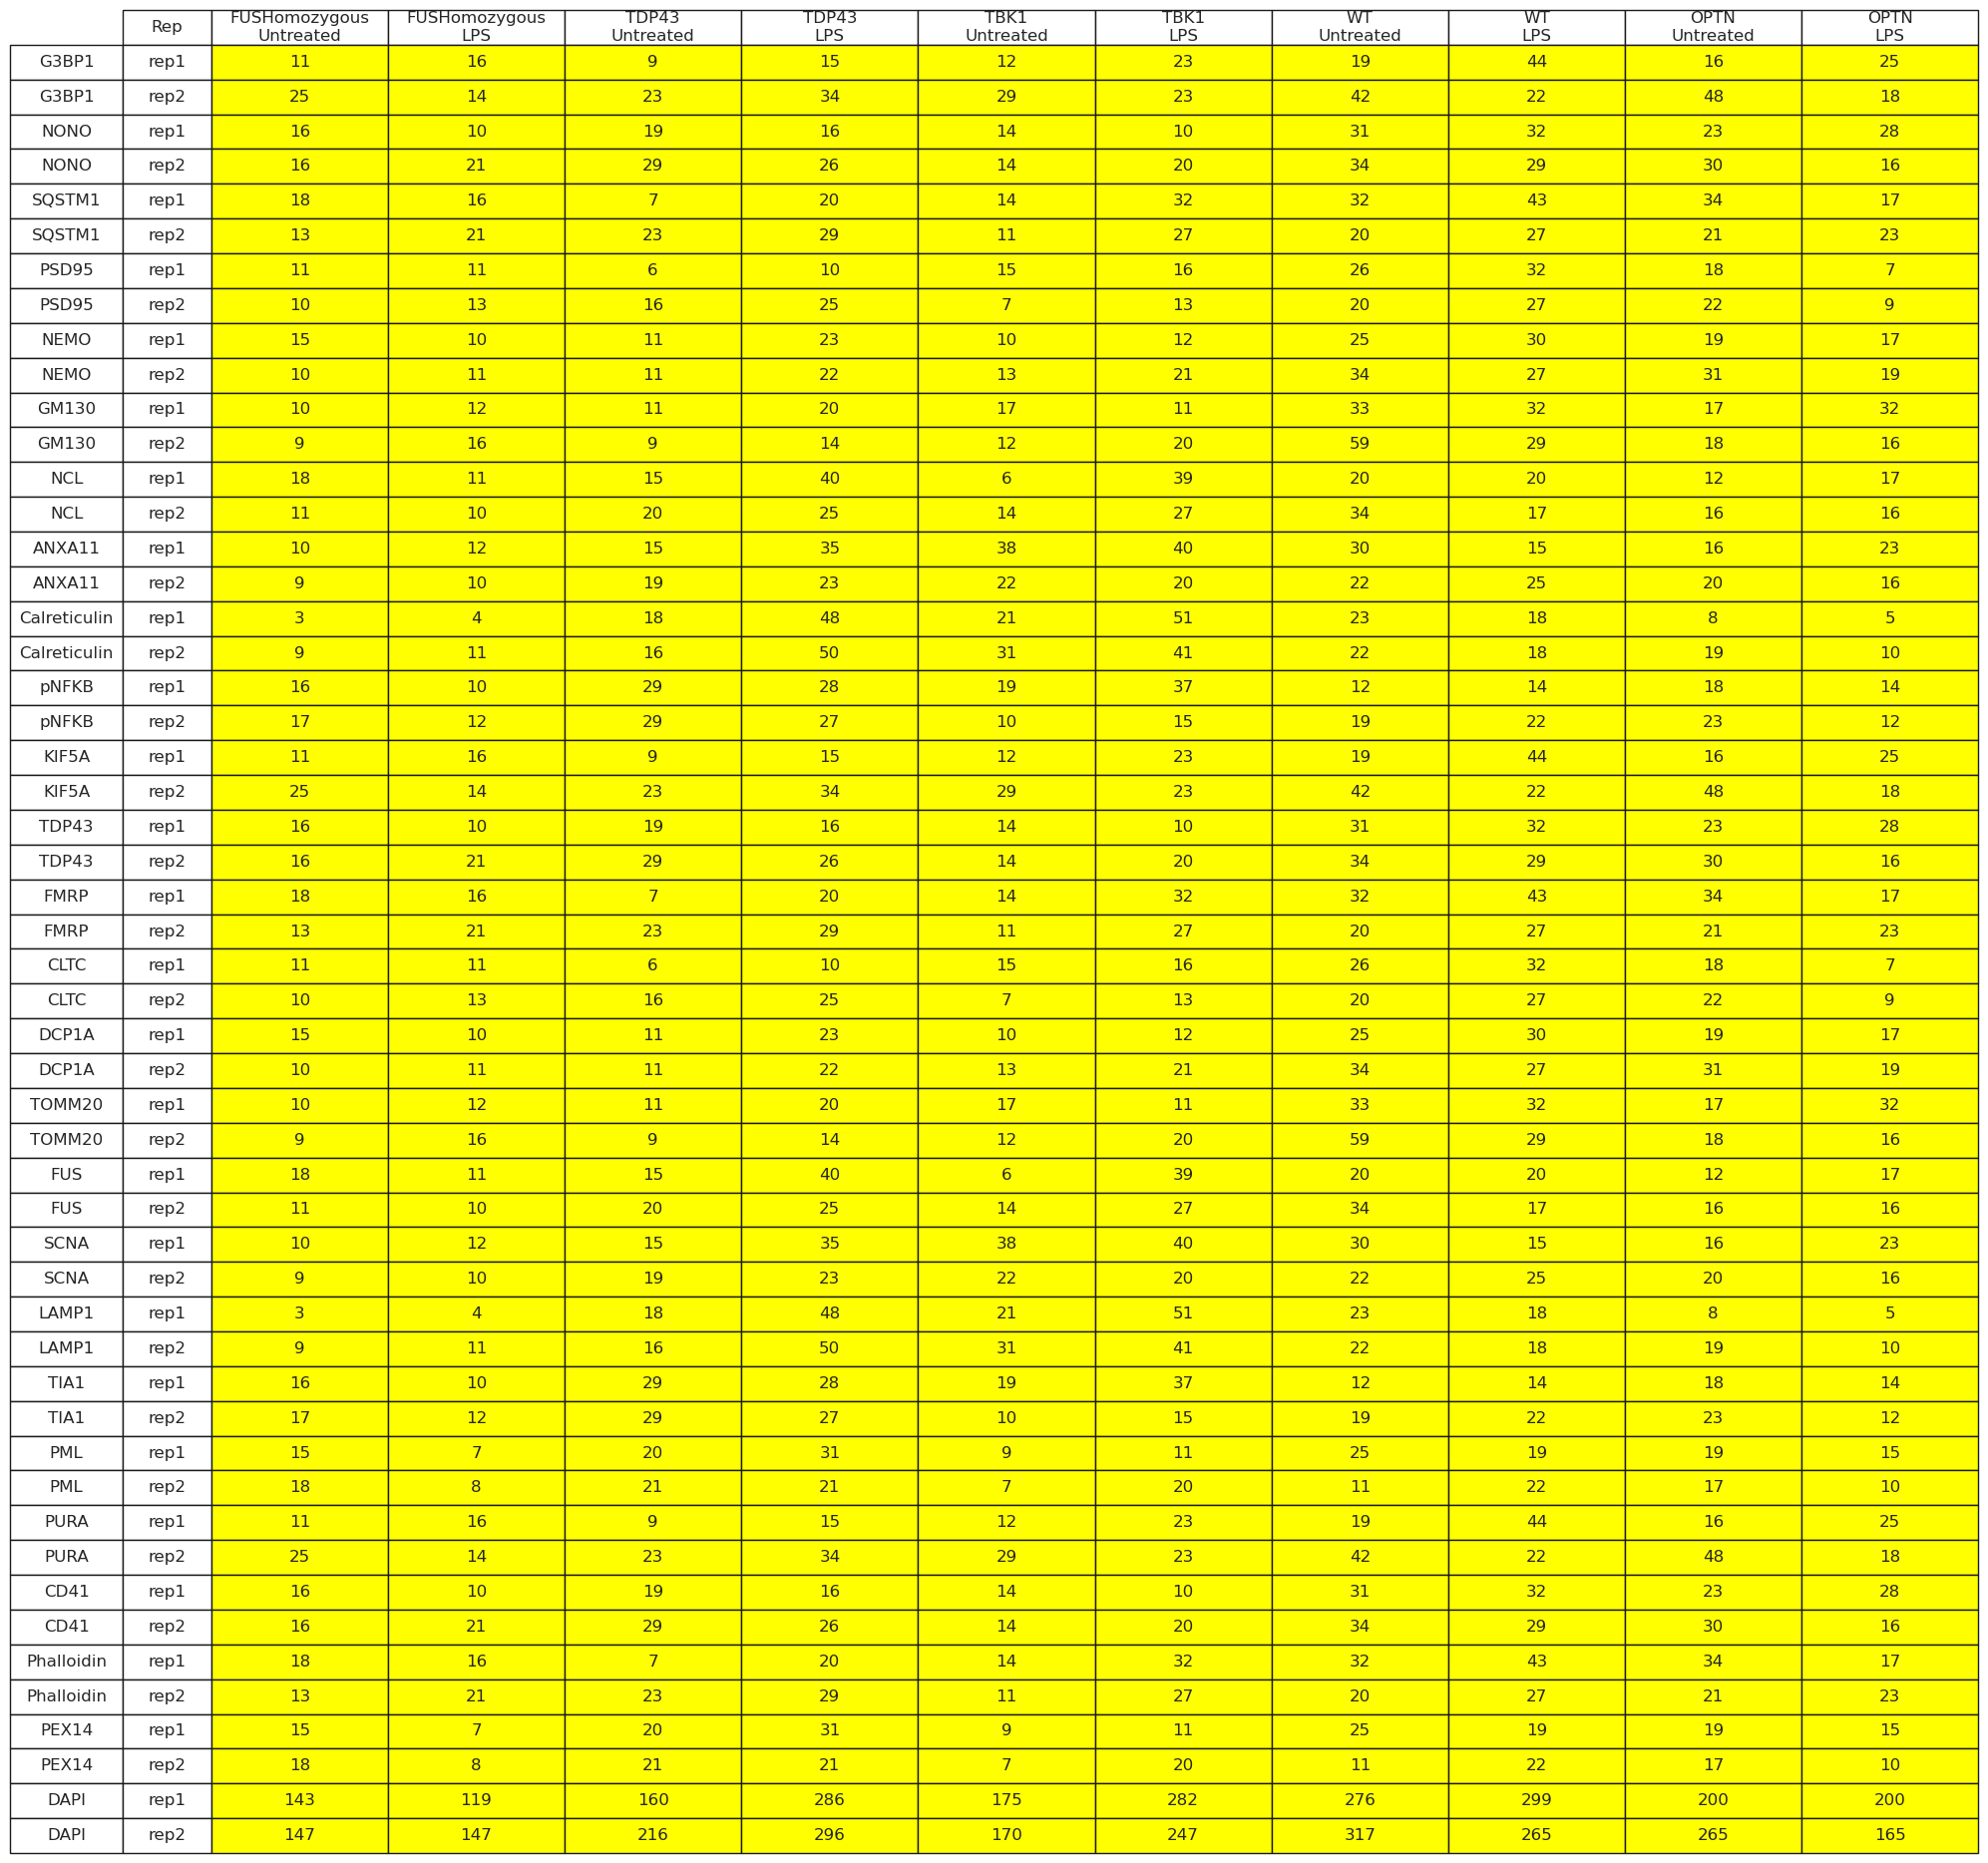

In [8]:
root_directory_proc = os.path.join(MOMAPS_DATA_HOME, 'input', 'images', 'processed', 'spd2',
                              'SpinningDisk','microglia_LPS')
procs = run_validate_folder_structure(root_directory_proc, True, microglia_LPS_panels, 
                                      microglia_LPS_markers,PLOT_PATH,
                                      microglia_LPS_marker_info,
                                    microglia_LPS_cell_lines_to_cond, reps, 
                                      microglia_LPS_cell_lines_for_disp, expected_dapi_raw,
                                     batches=batches)

### Difference between Raw and Processed

batch1


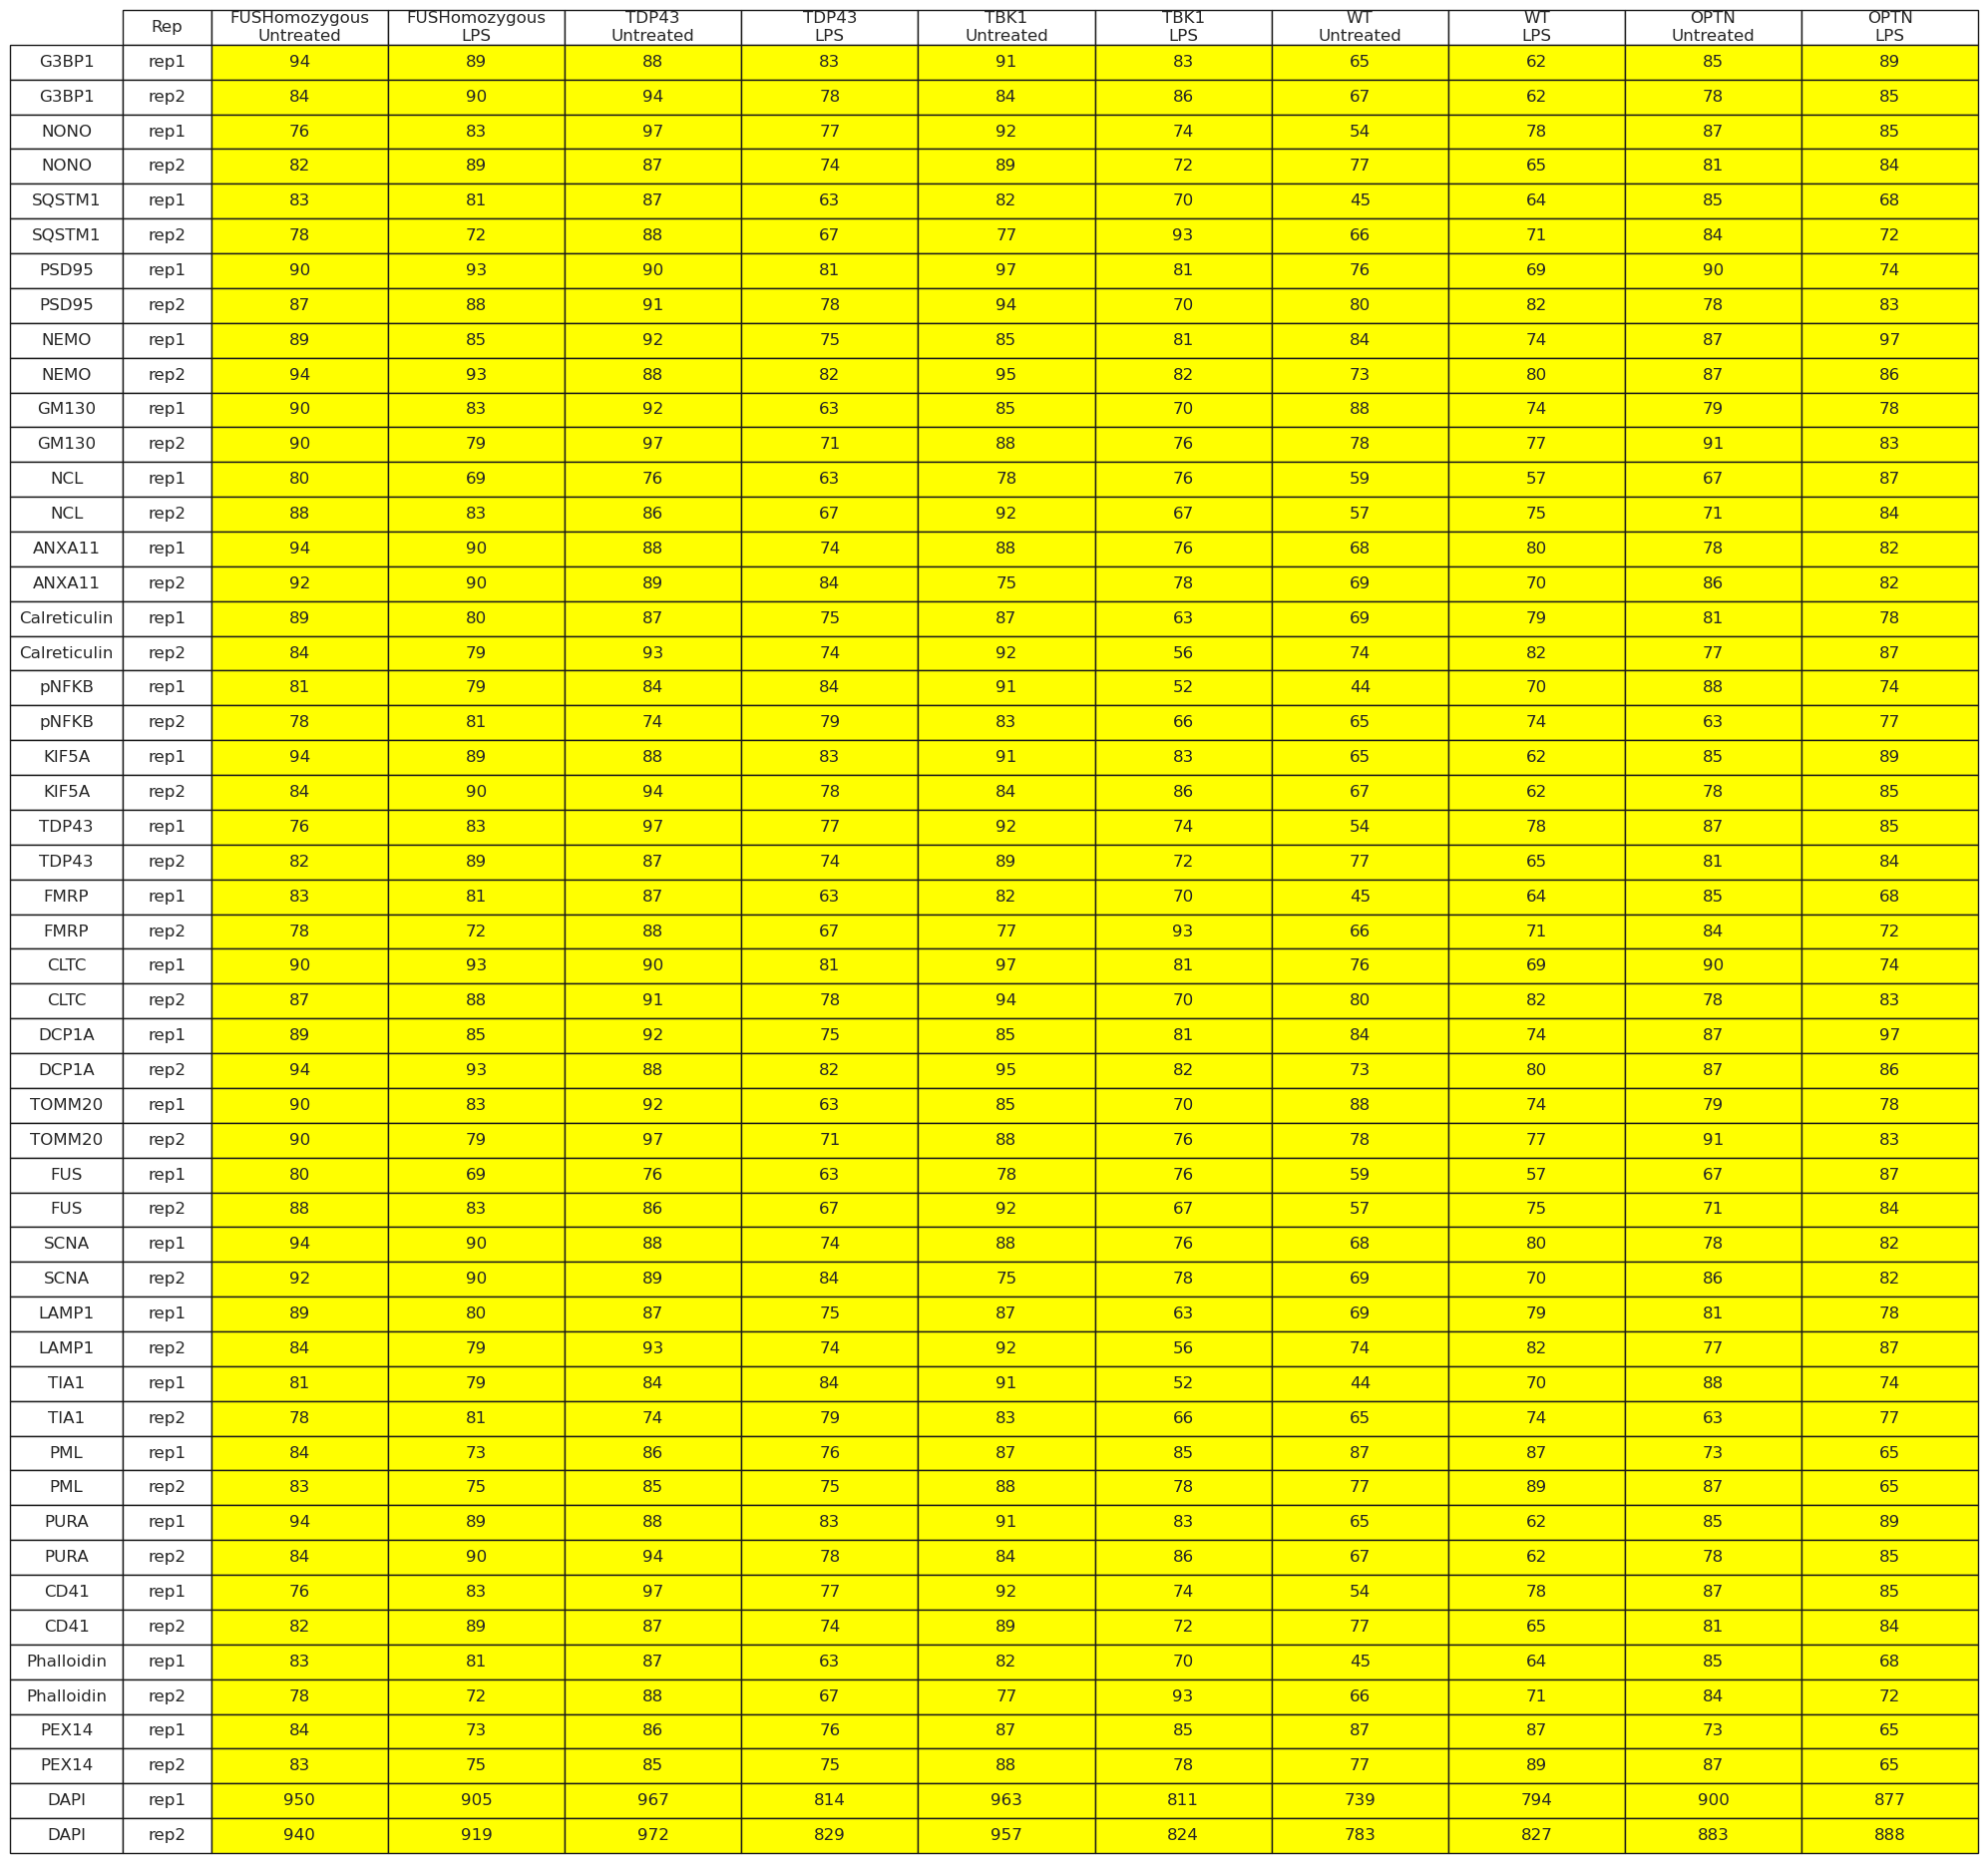

batch2


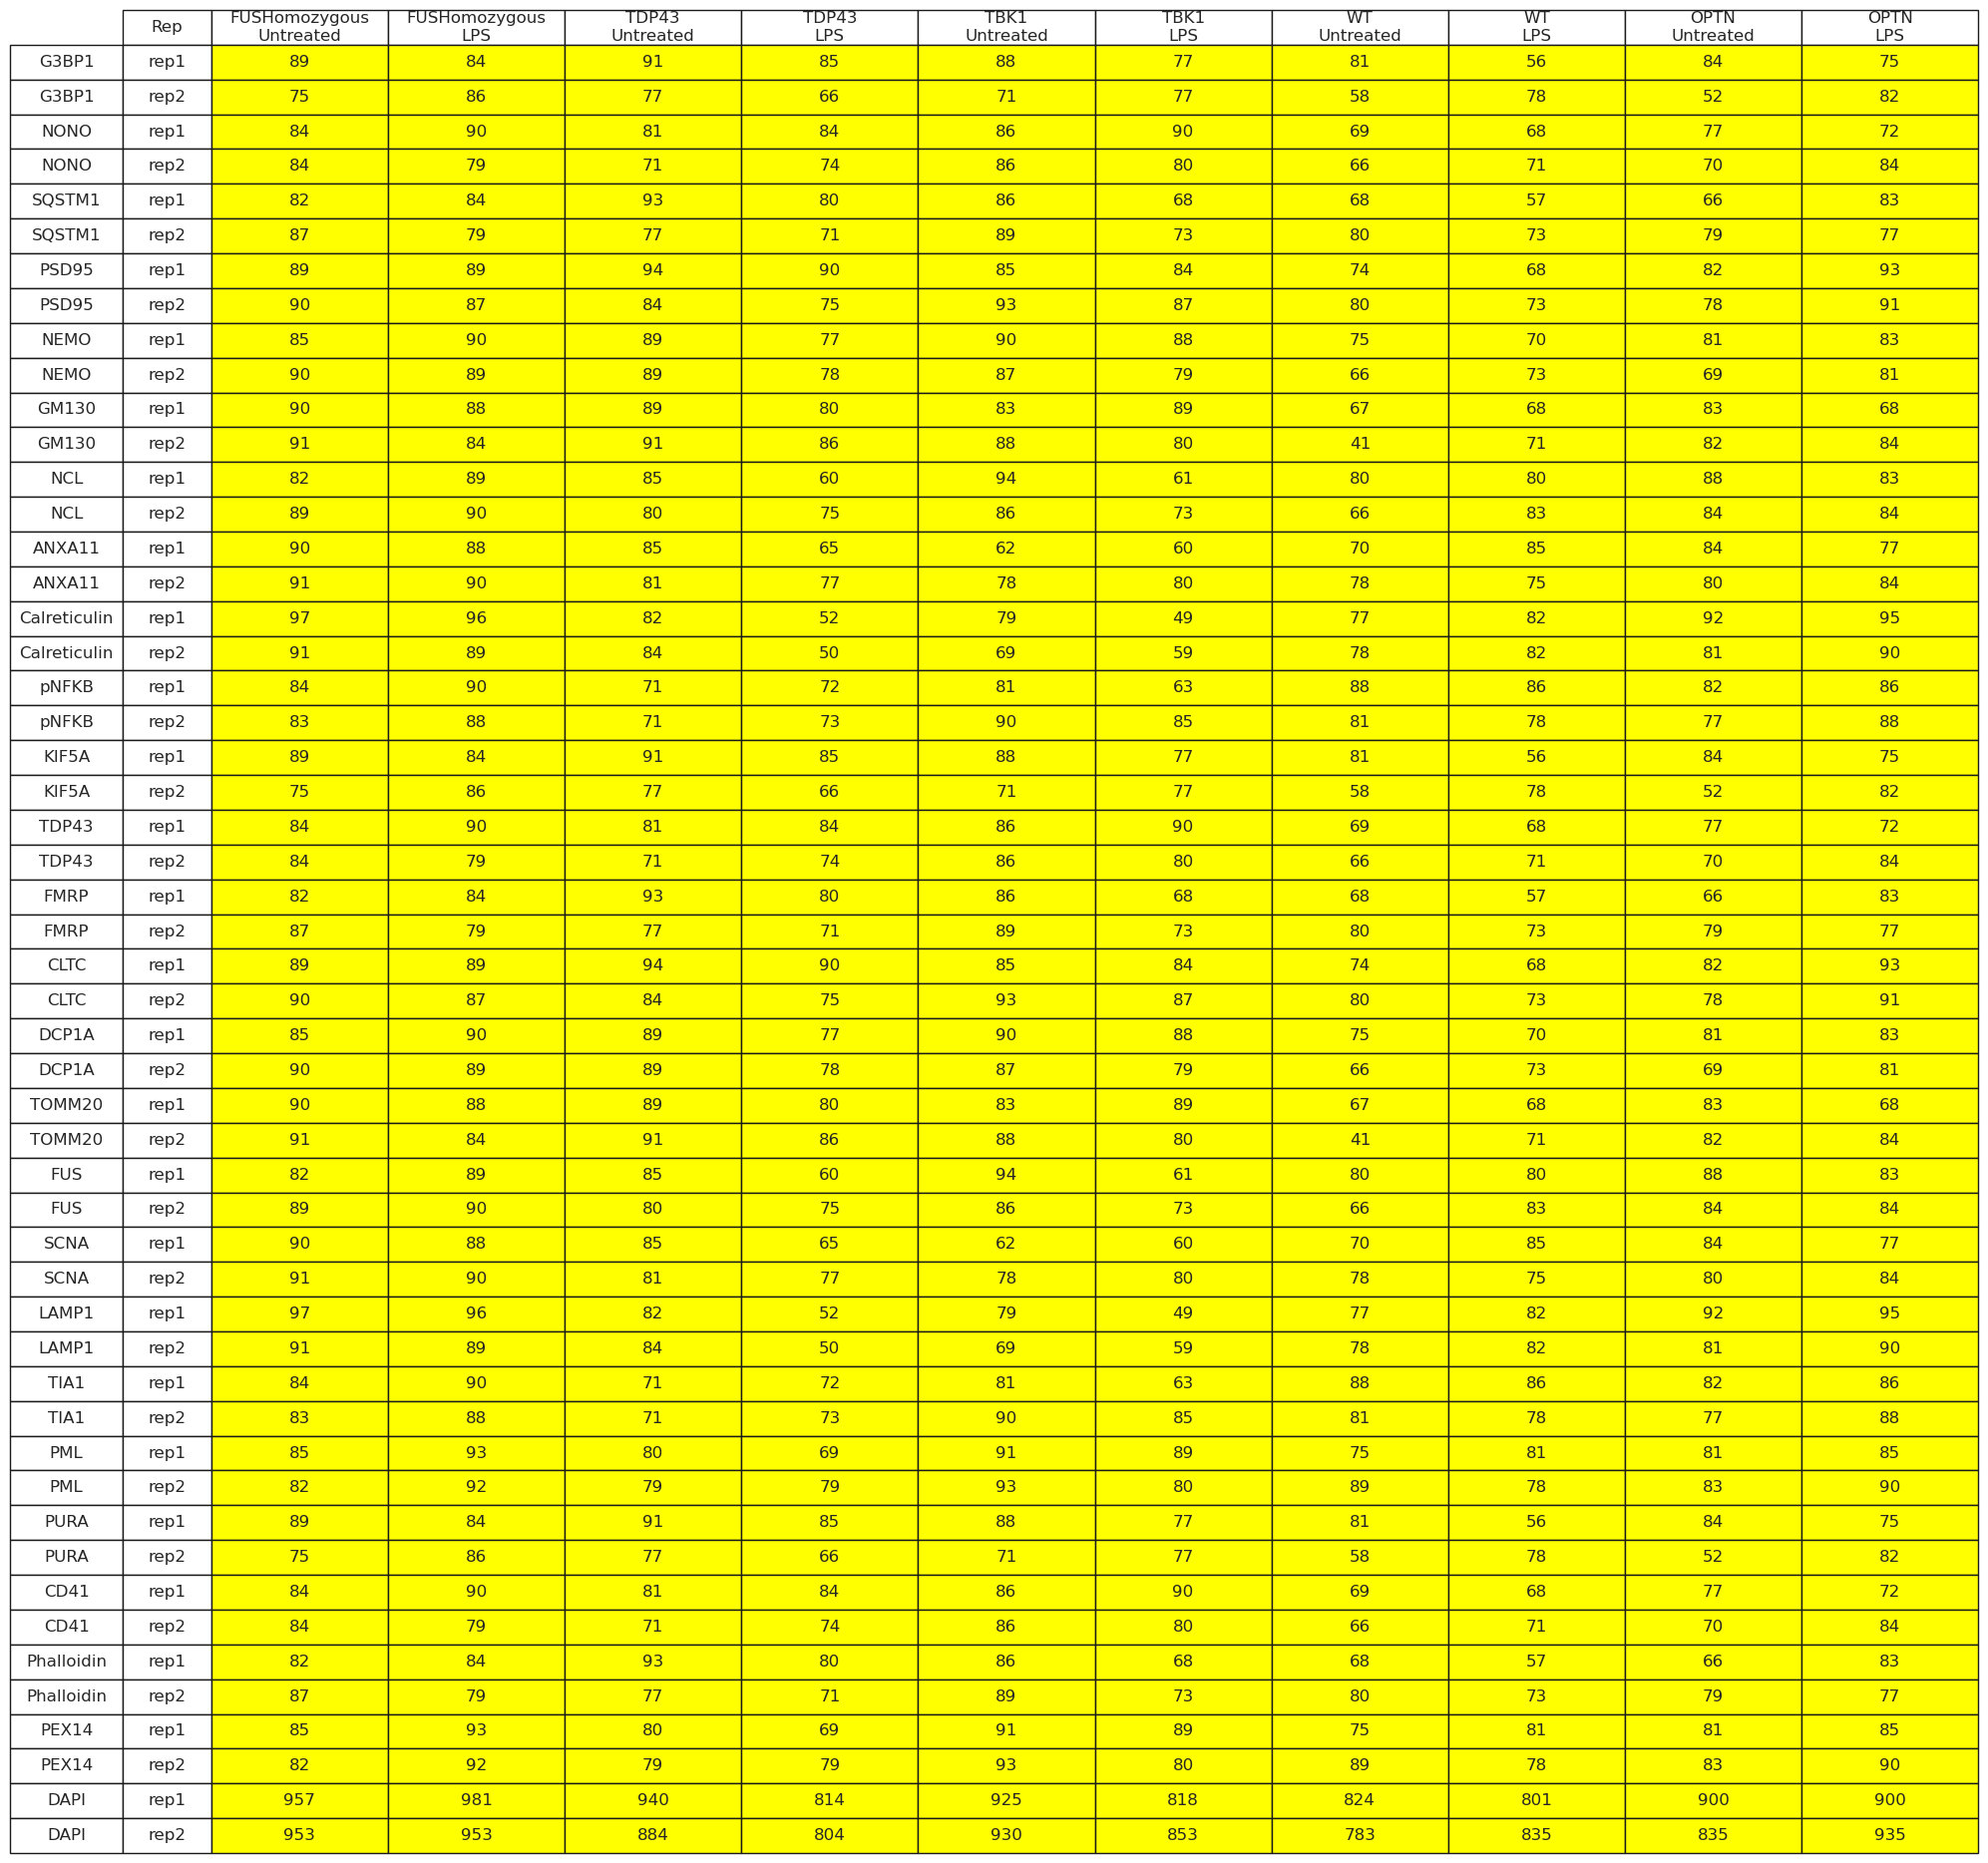

In [9]:
display_diff(batches, raws, procs, PLOT_PATH)

In [11]:
#for batch in list(range(3,9)) + ['7_16bit','8_16bit','9_16bit']: #problem with batch9: files that are 1 bytes!!!  
for batch in batches:
    with contextlib.redirect_stdout(io.StringIO()):
        var = sample_and_calc_variance(root_directory_proc, batch, 
                                       sample_size_per_markers=200, num_markers=26,
                                      cond_count=2, rep_count=len(reps))
    print(f'{batch} var: ',var)

batch1 var:  0.009460750569401726
batch2 var:  0.009749109501937359



# <font color='red'>Number of sites in each batch and cell line </font>


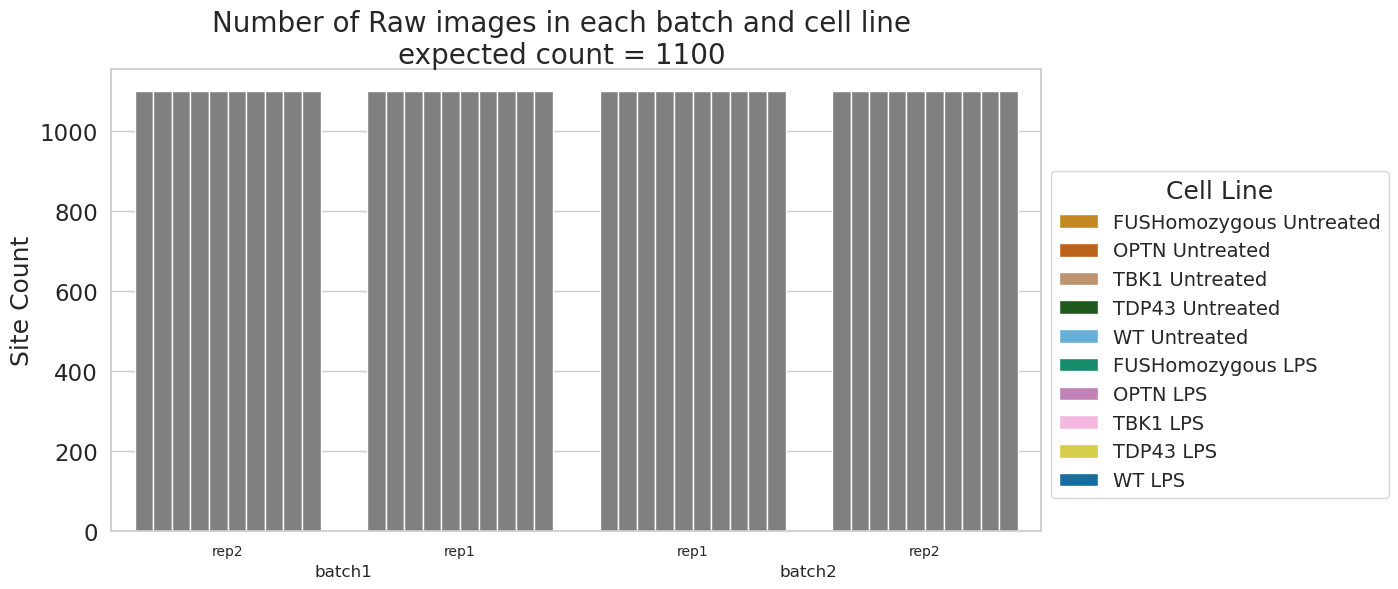

In [5]:
plot_sites_count(df, expected_raw, microglia_LPS_lines_order, 
                 microglia_LPS_custom_palette, split_to_reps=True)

# <font color='red'>Number of Cells in Site for each batch and cell line </font>

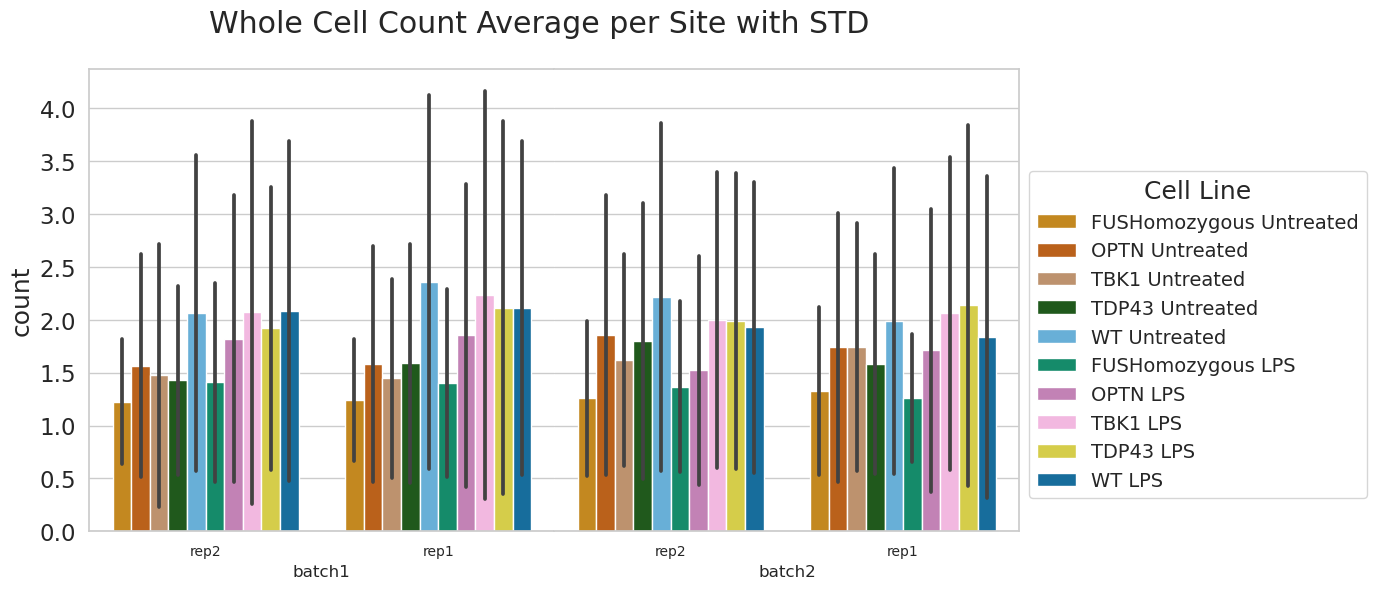

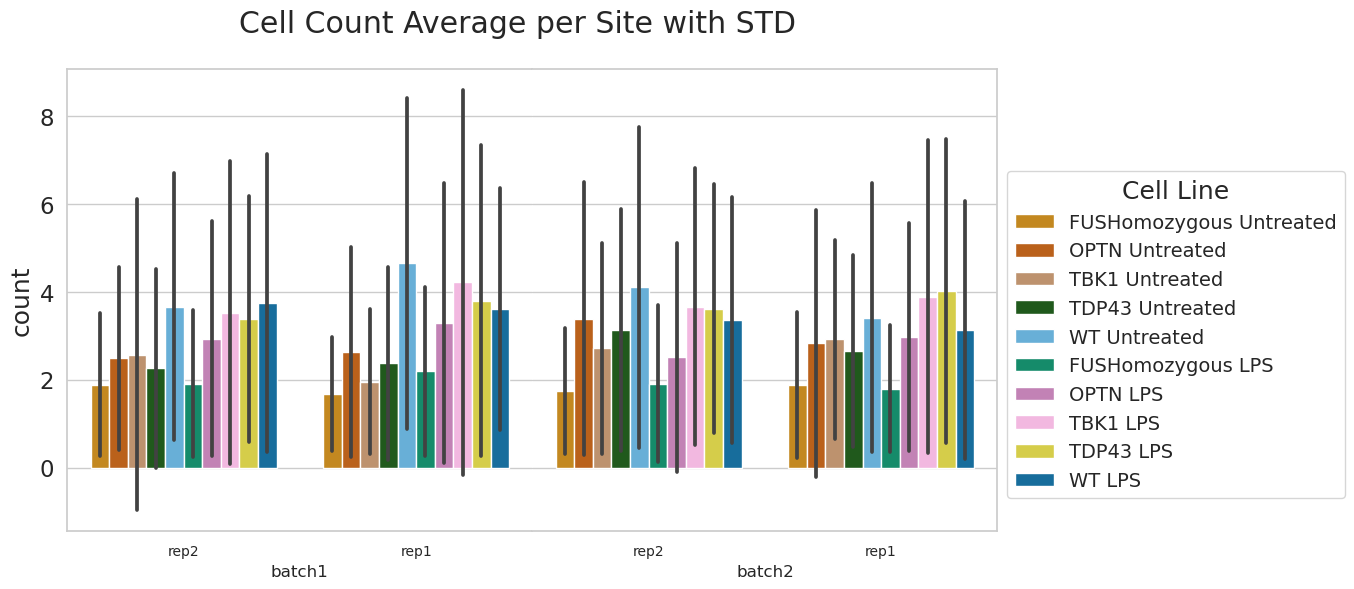

In [6]:
df_no_empty_sites = df[df.n_valid_tiles !=0]
plot_cell_count(df_no_empty_sites, microglia_LPS_lines_order, microglia_LPS_custom_palette, 
                whole_cells=True)

plot_cell_count(df_no_empty_sites, microglia_LPS_lines_order, microglia_LPS_custom_palette, 
                whole_cells=False)
# can add norm=True to norm by max


# <font color='blue'>number of valid tiles per image (site)</font>


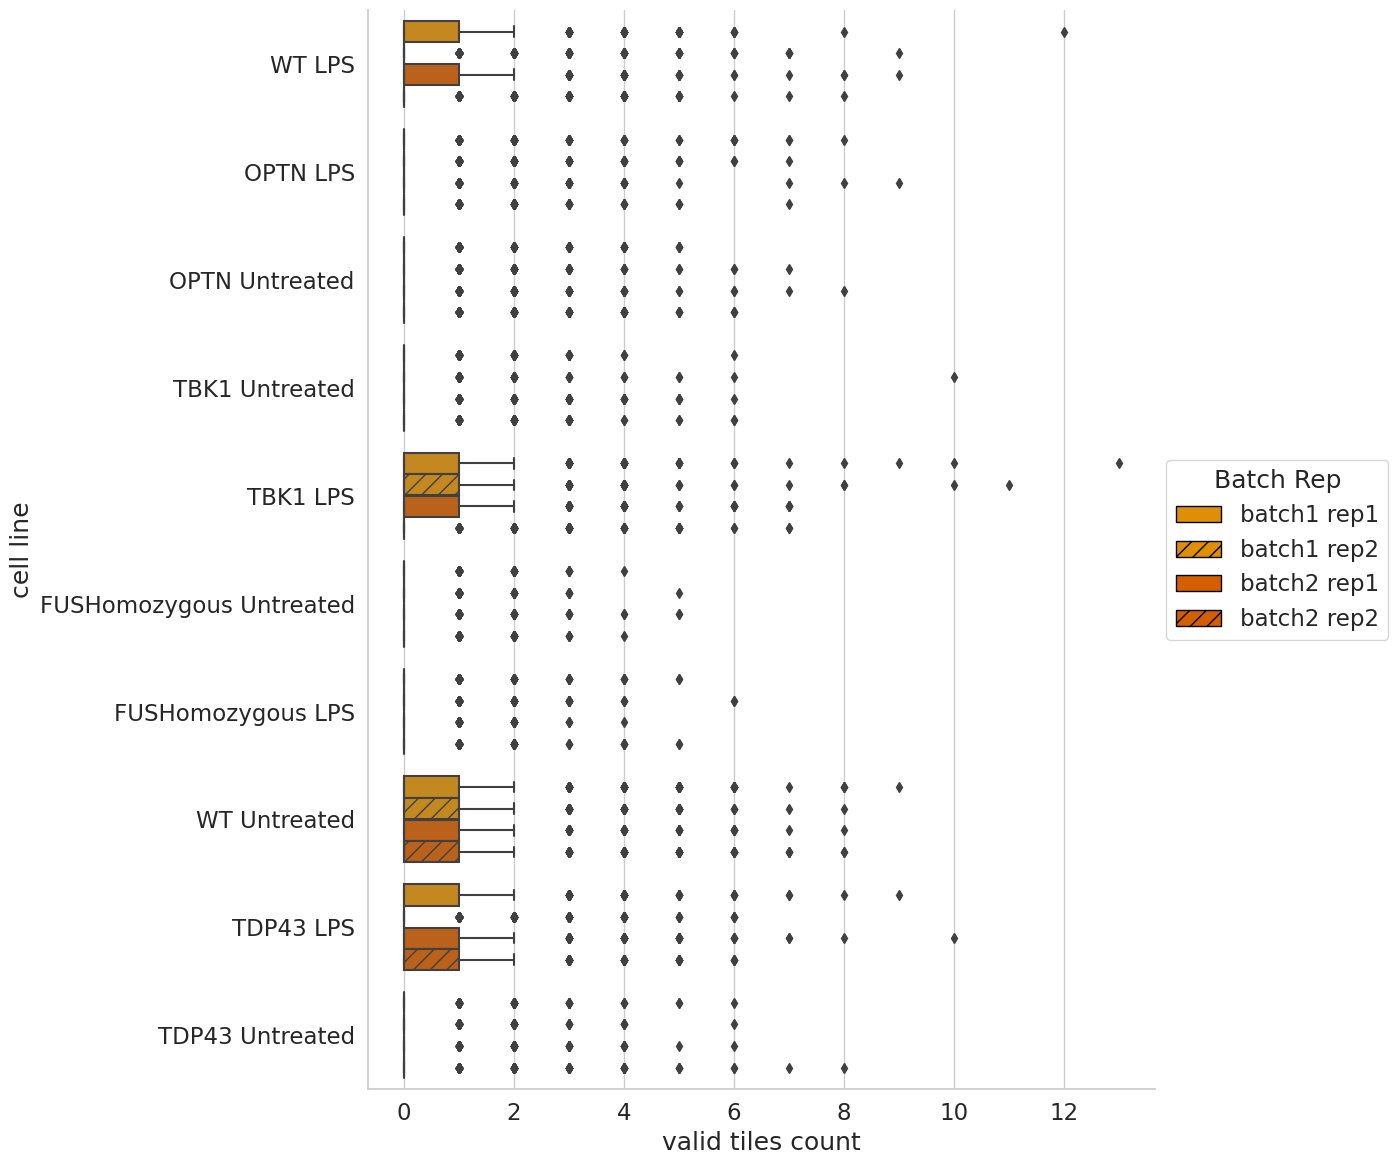

In [7]:
plot_n_valid_tiles_count(df, microglia_LPS_custom_palette,reps, batch_min=1, batch_max=2)


## <font color='purple'>Heatmap QC per batch, panel and cell line(tiles that passed QC condition)  </font>


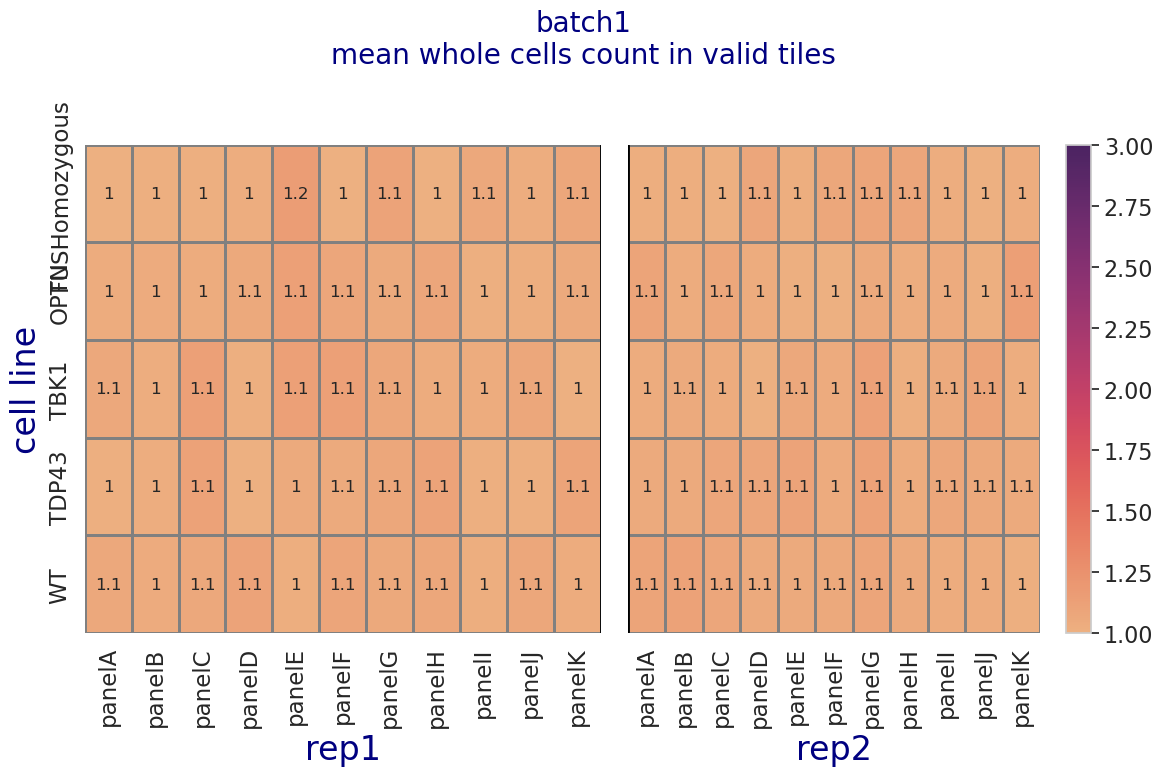

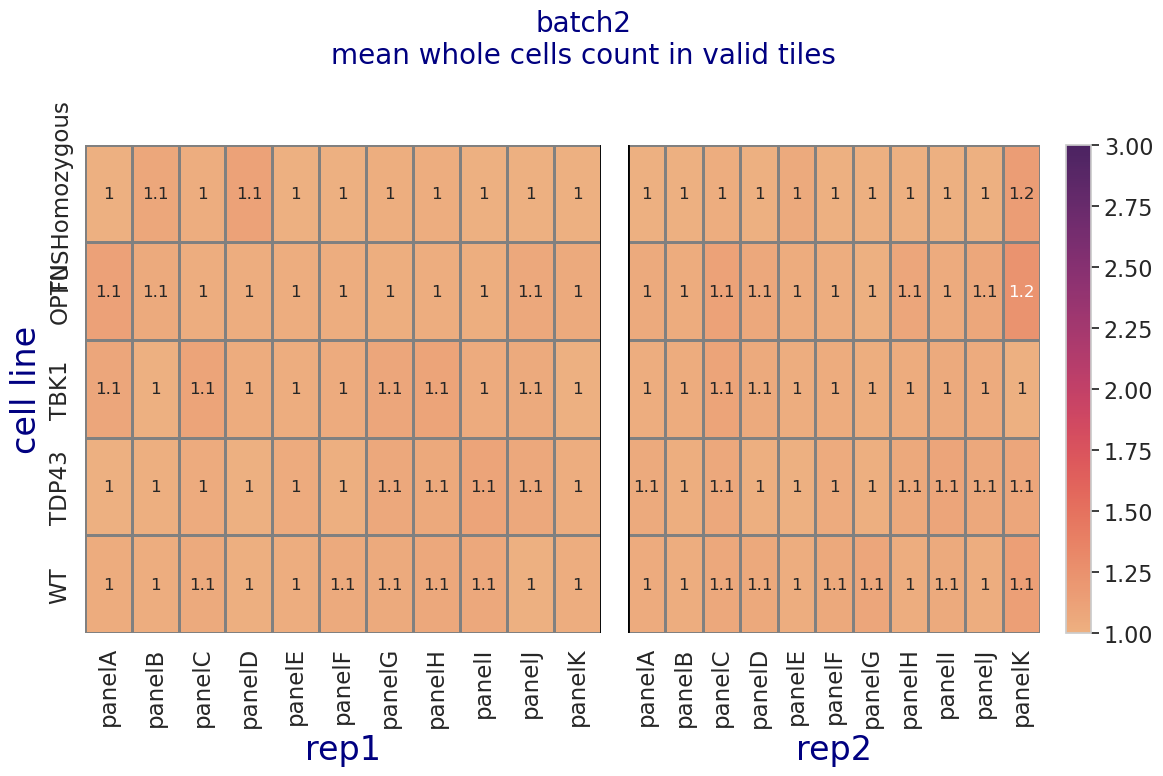

In [51]:
plot_hm(df, split_by='rep', rows='cell_line', columns='panel')

# Assessing Staining Reproducibility and Outliers

batch1


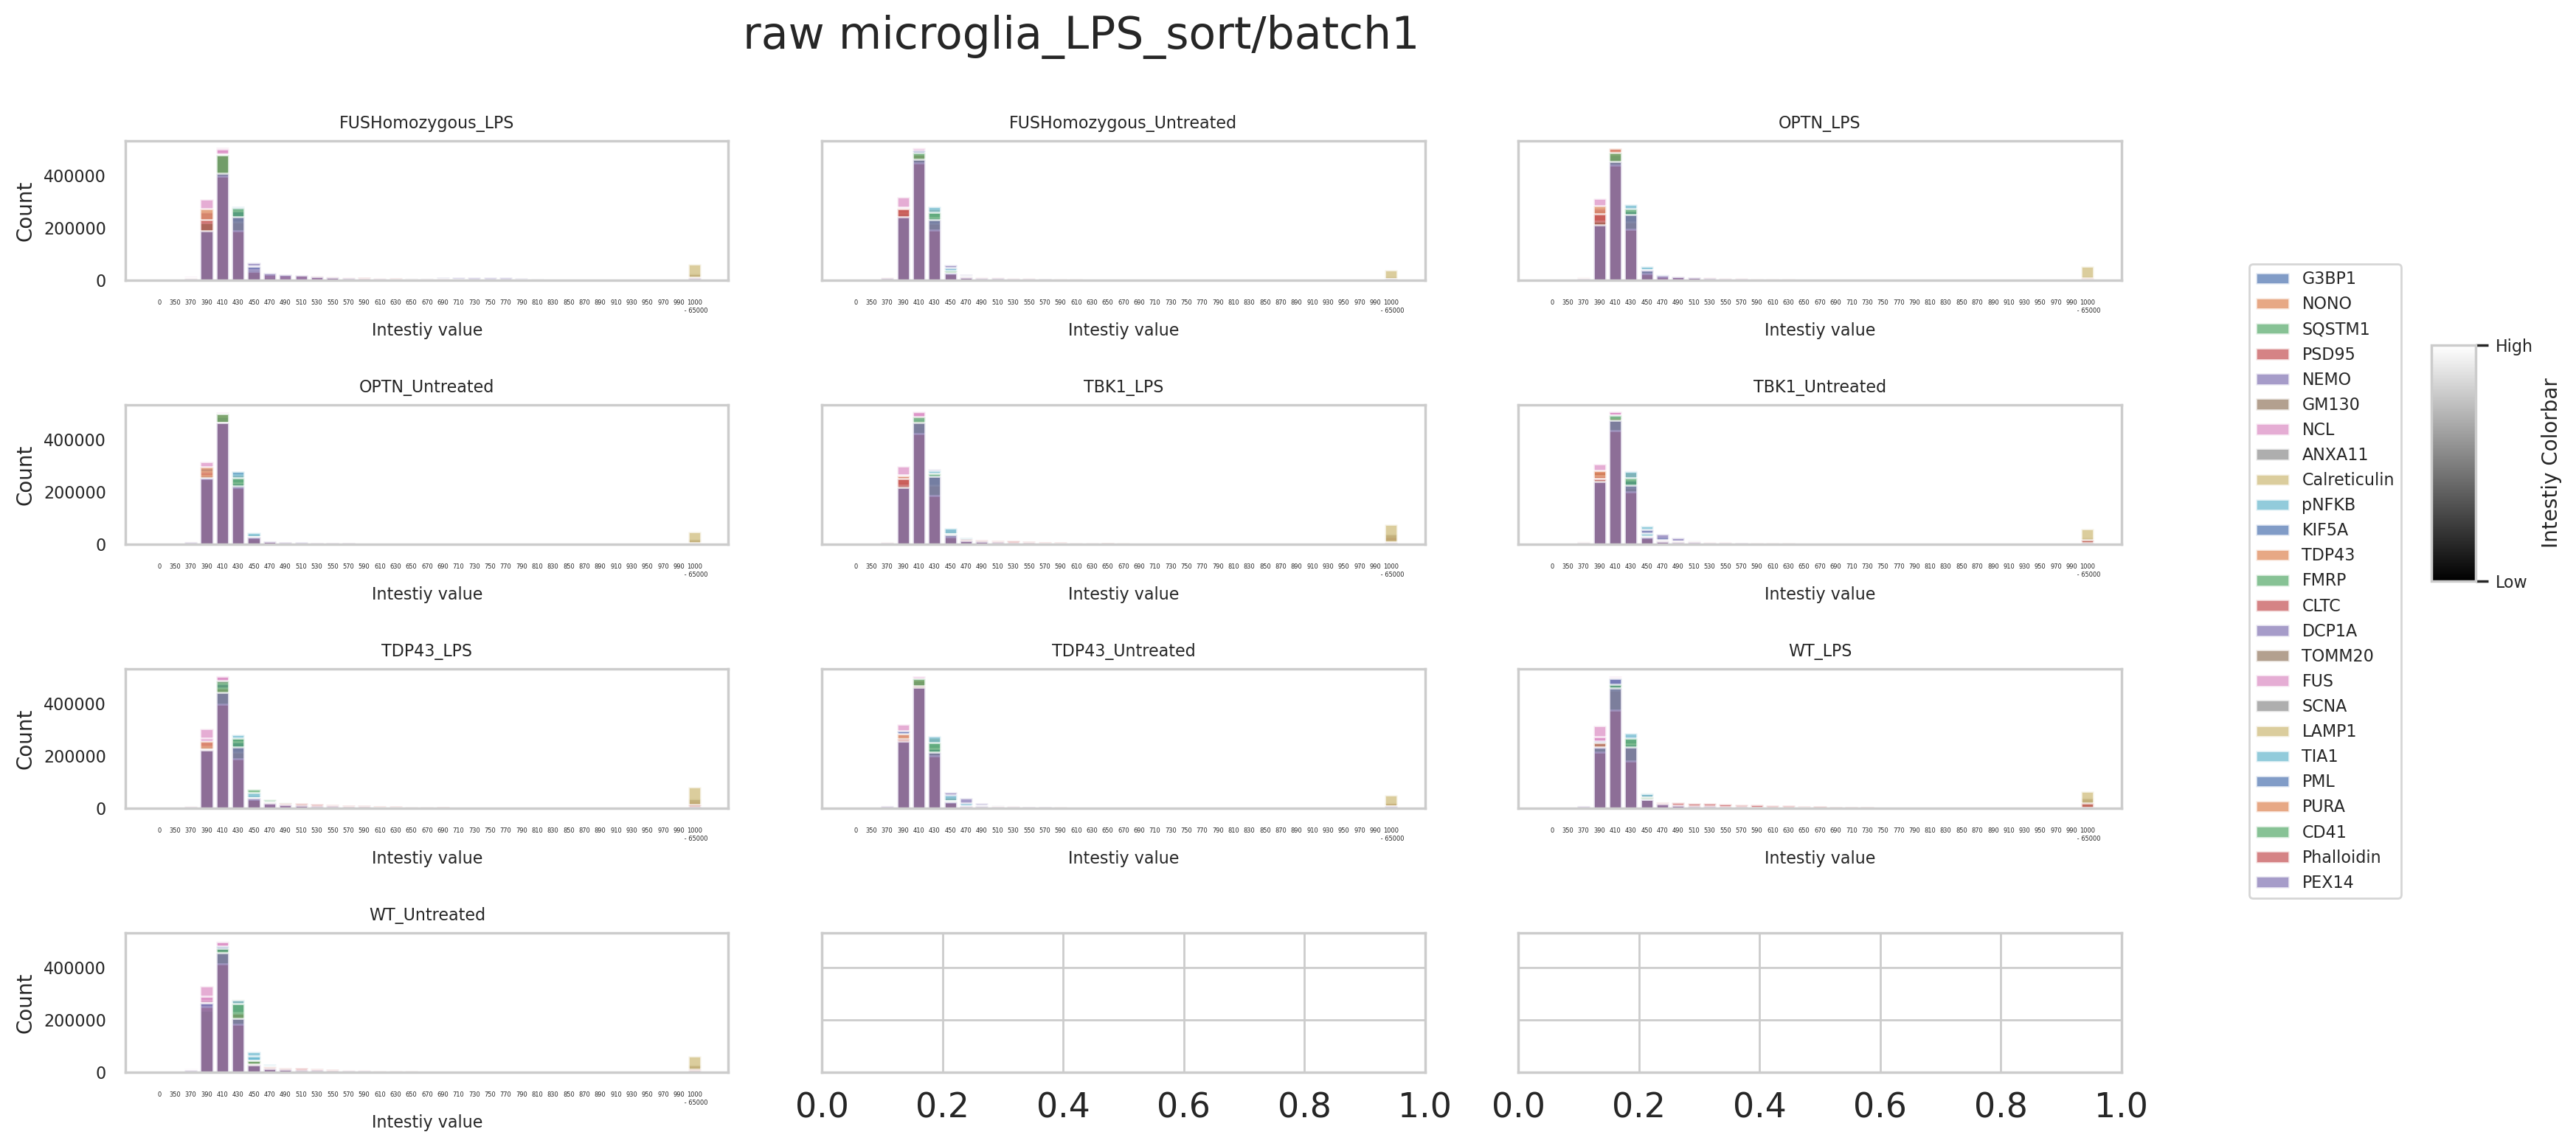

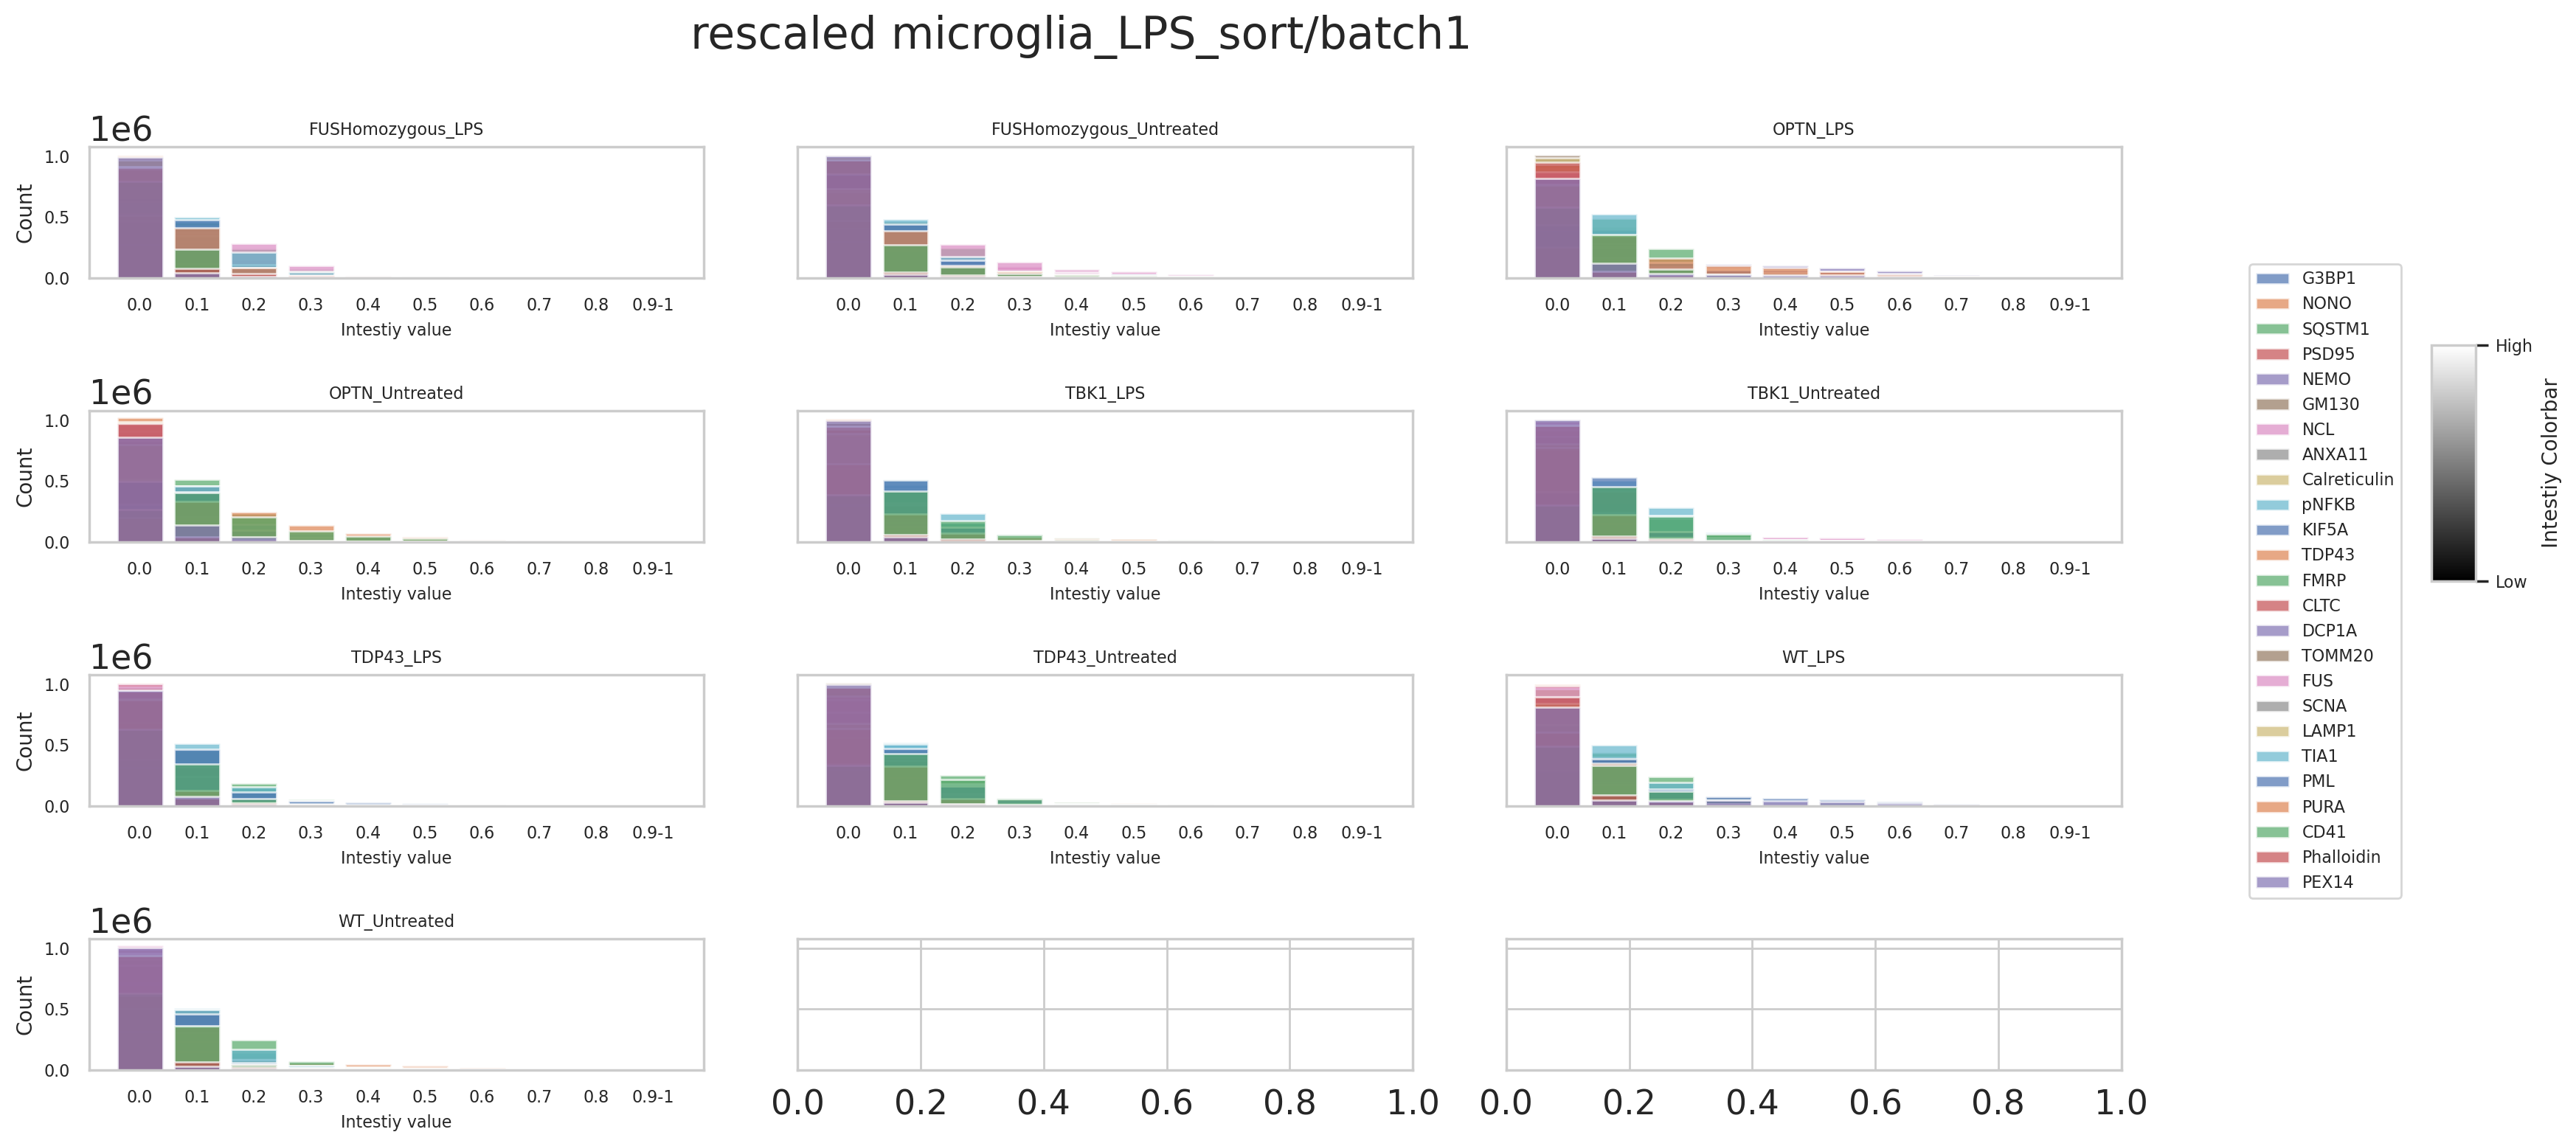

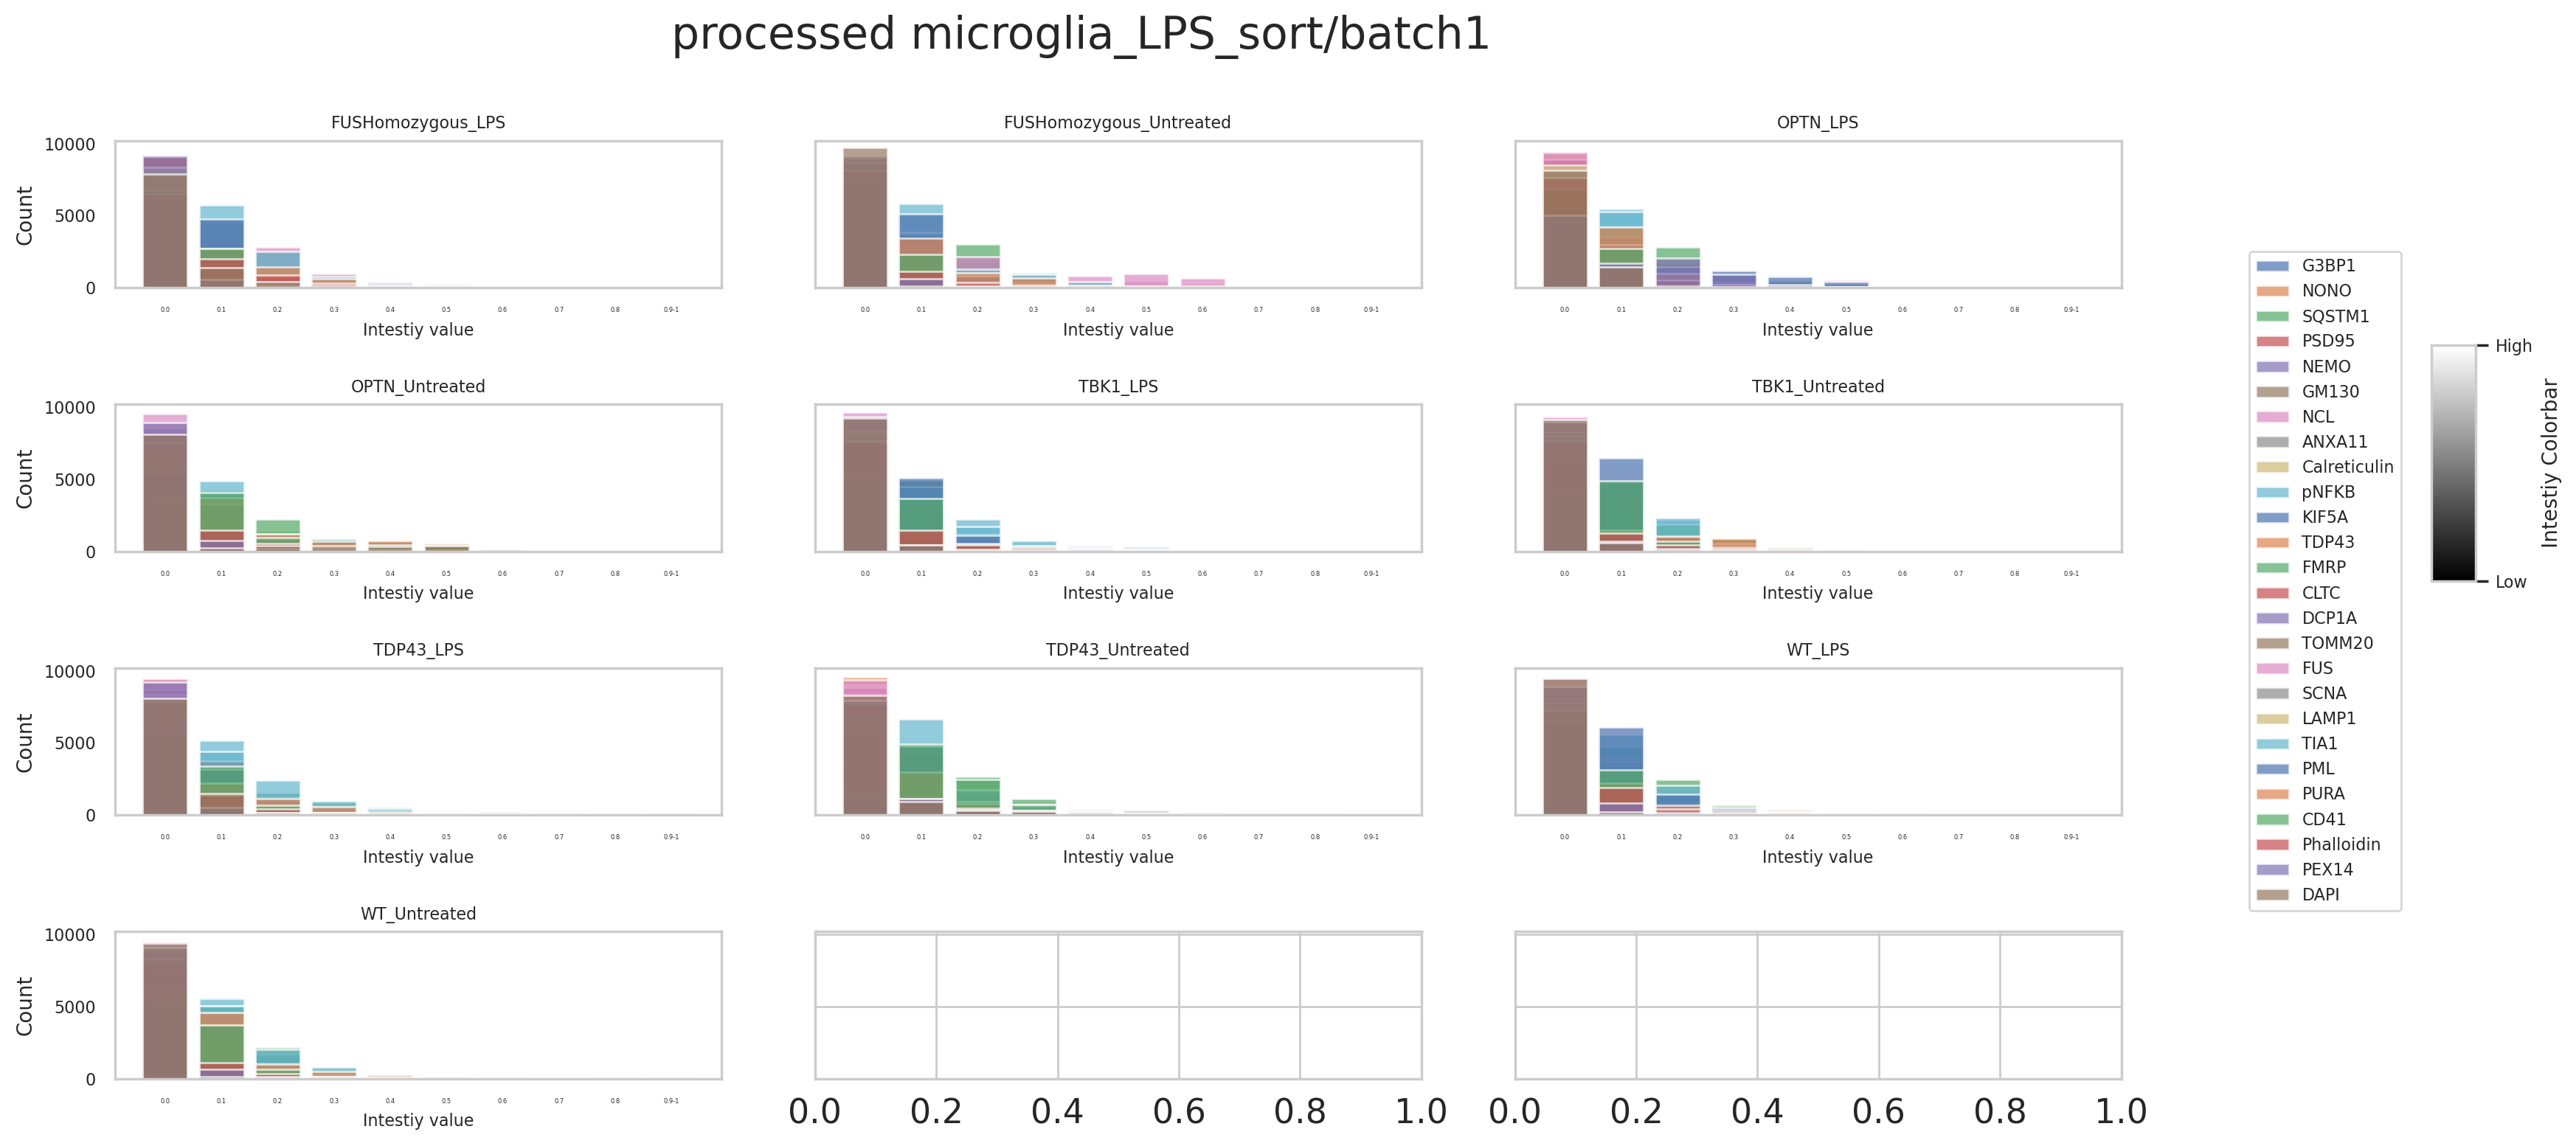

batch2


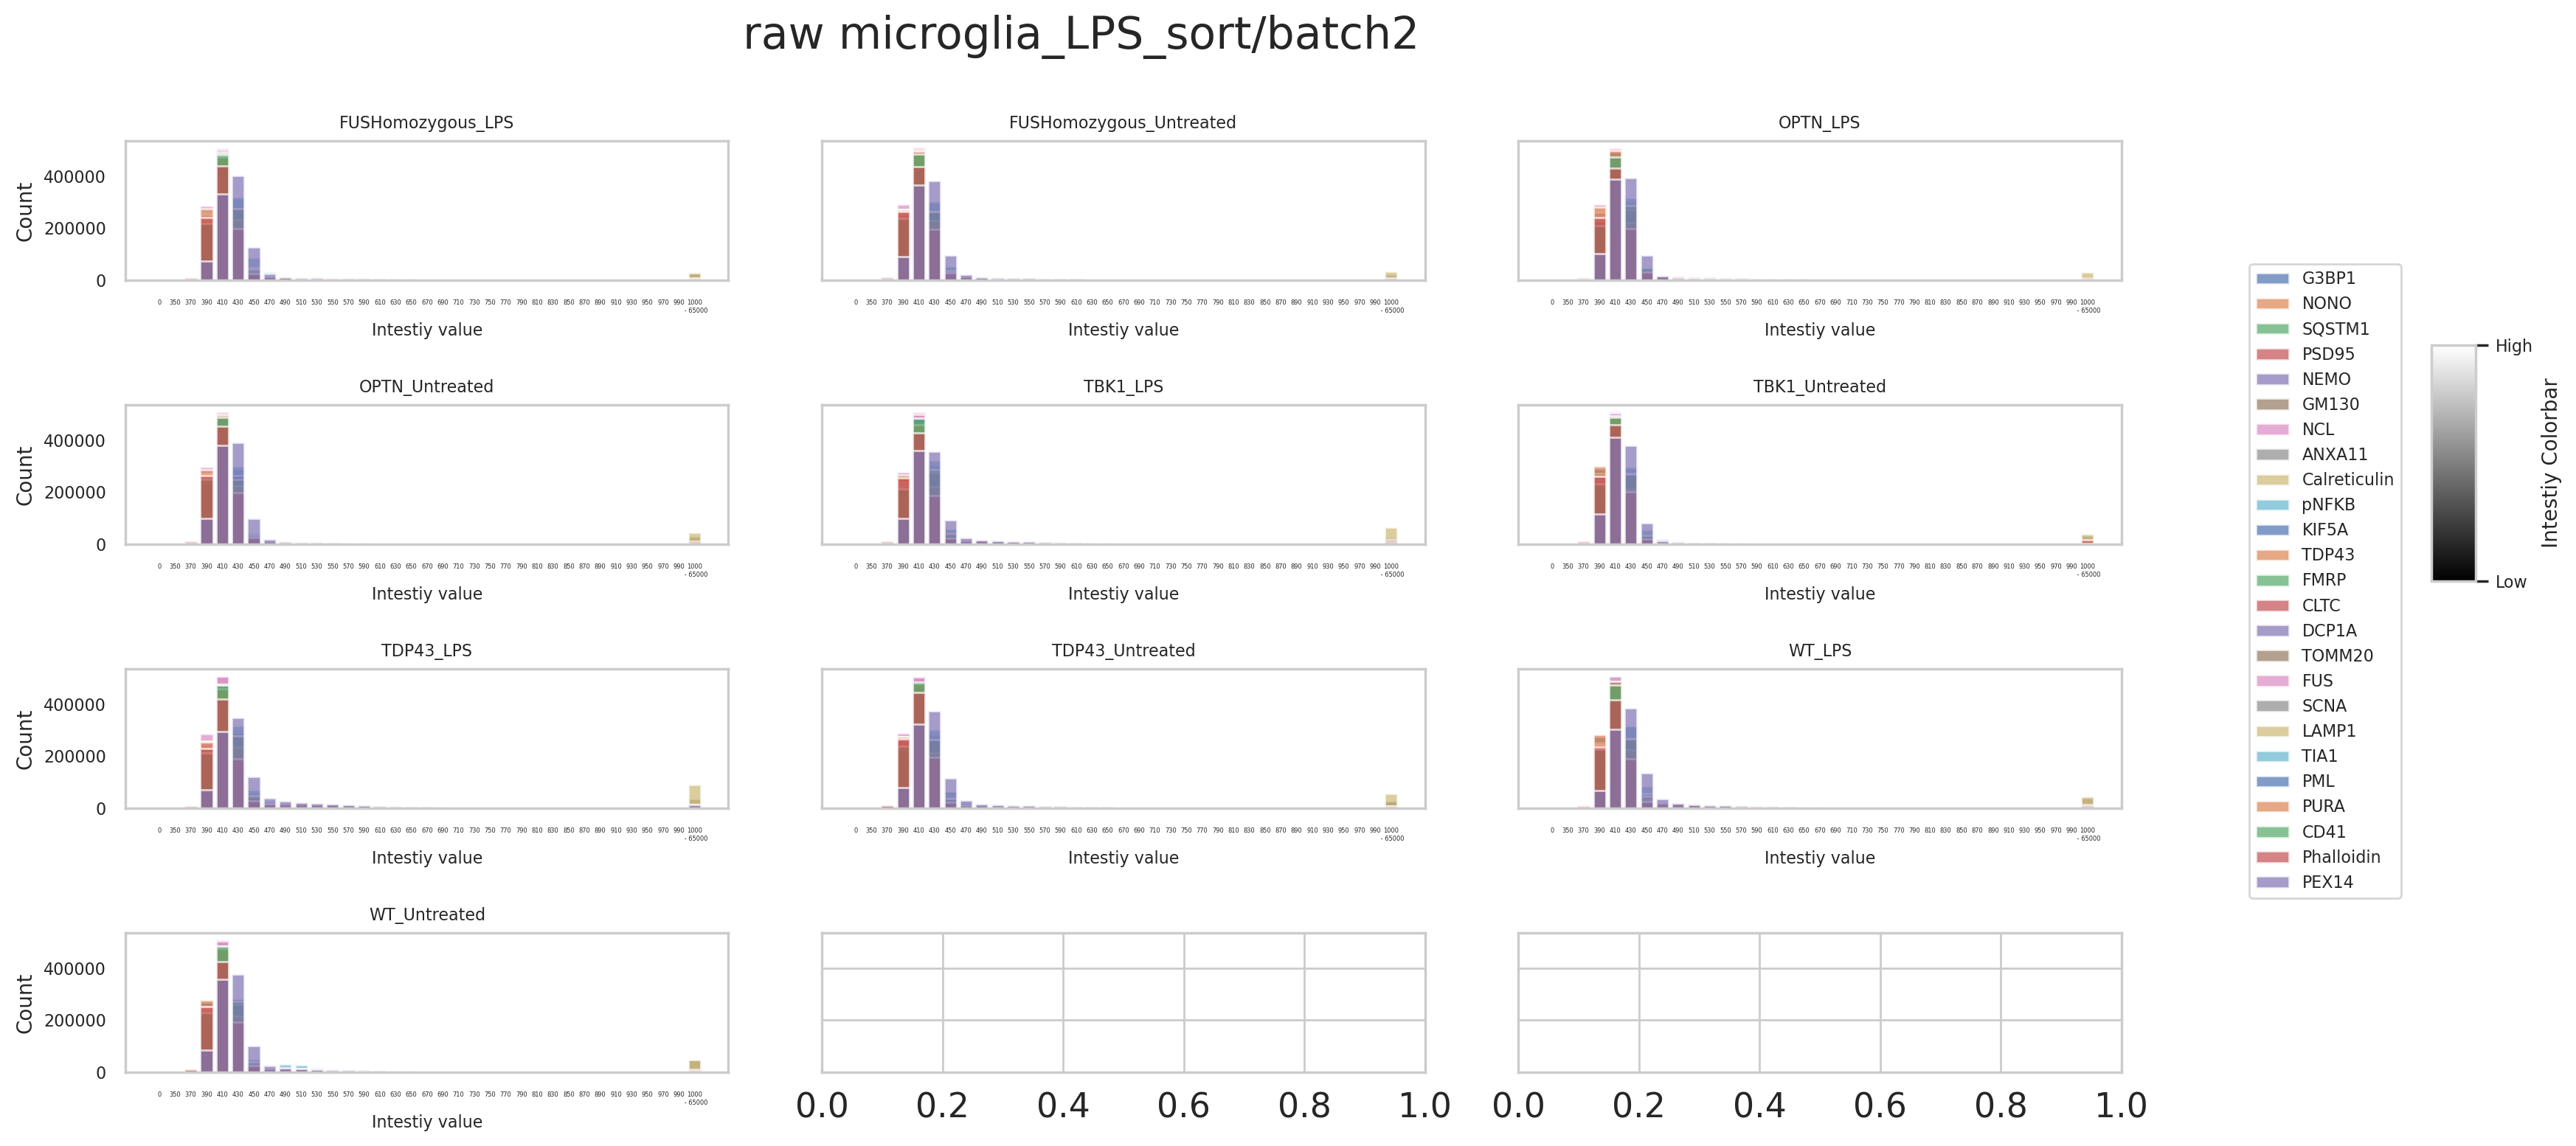

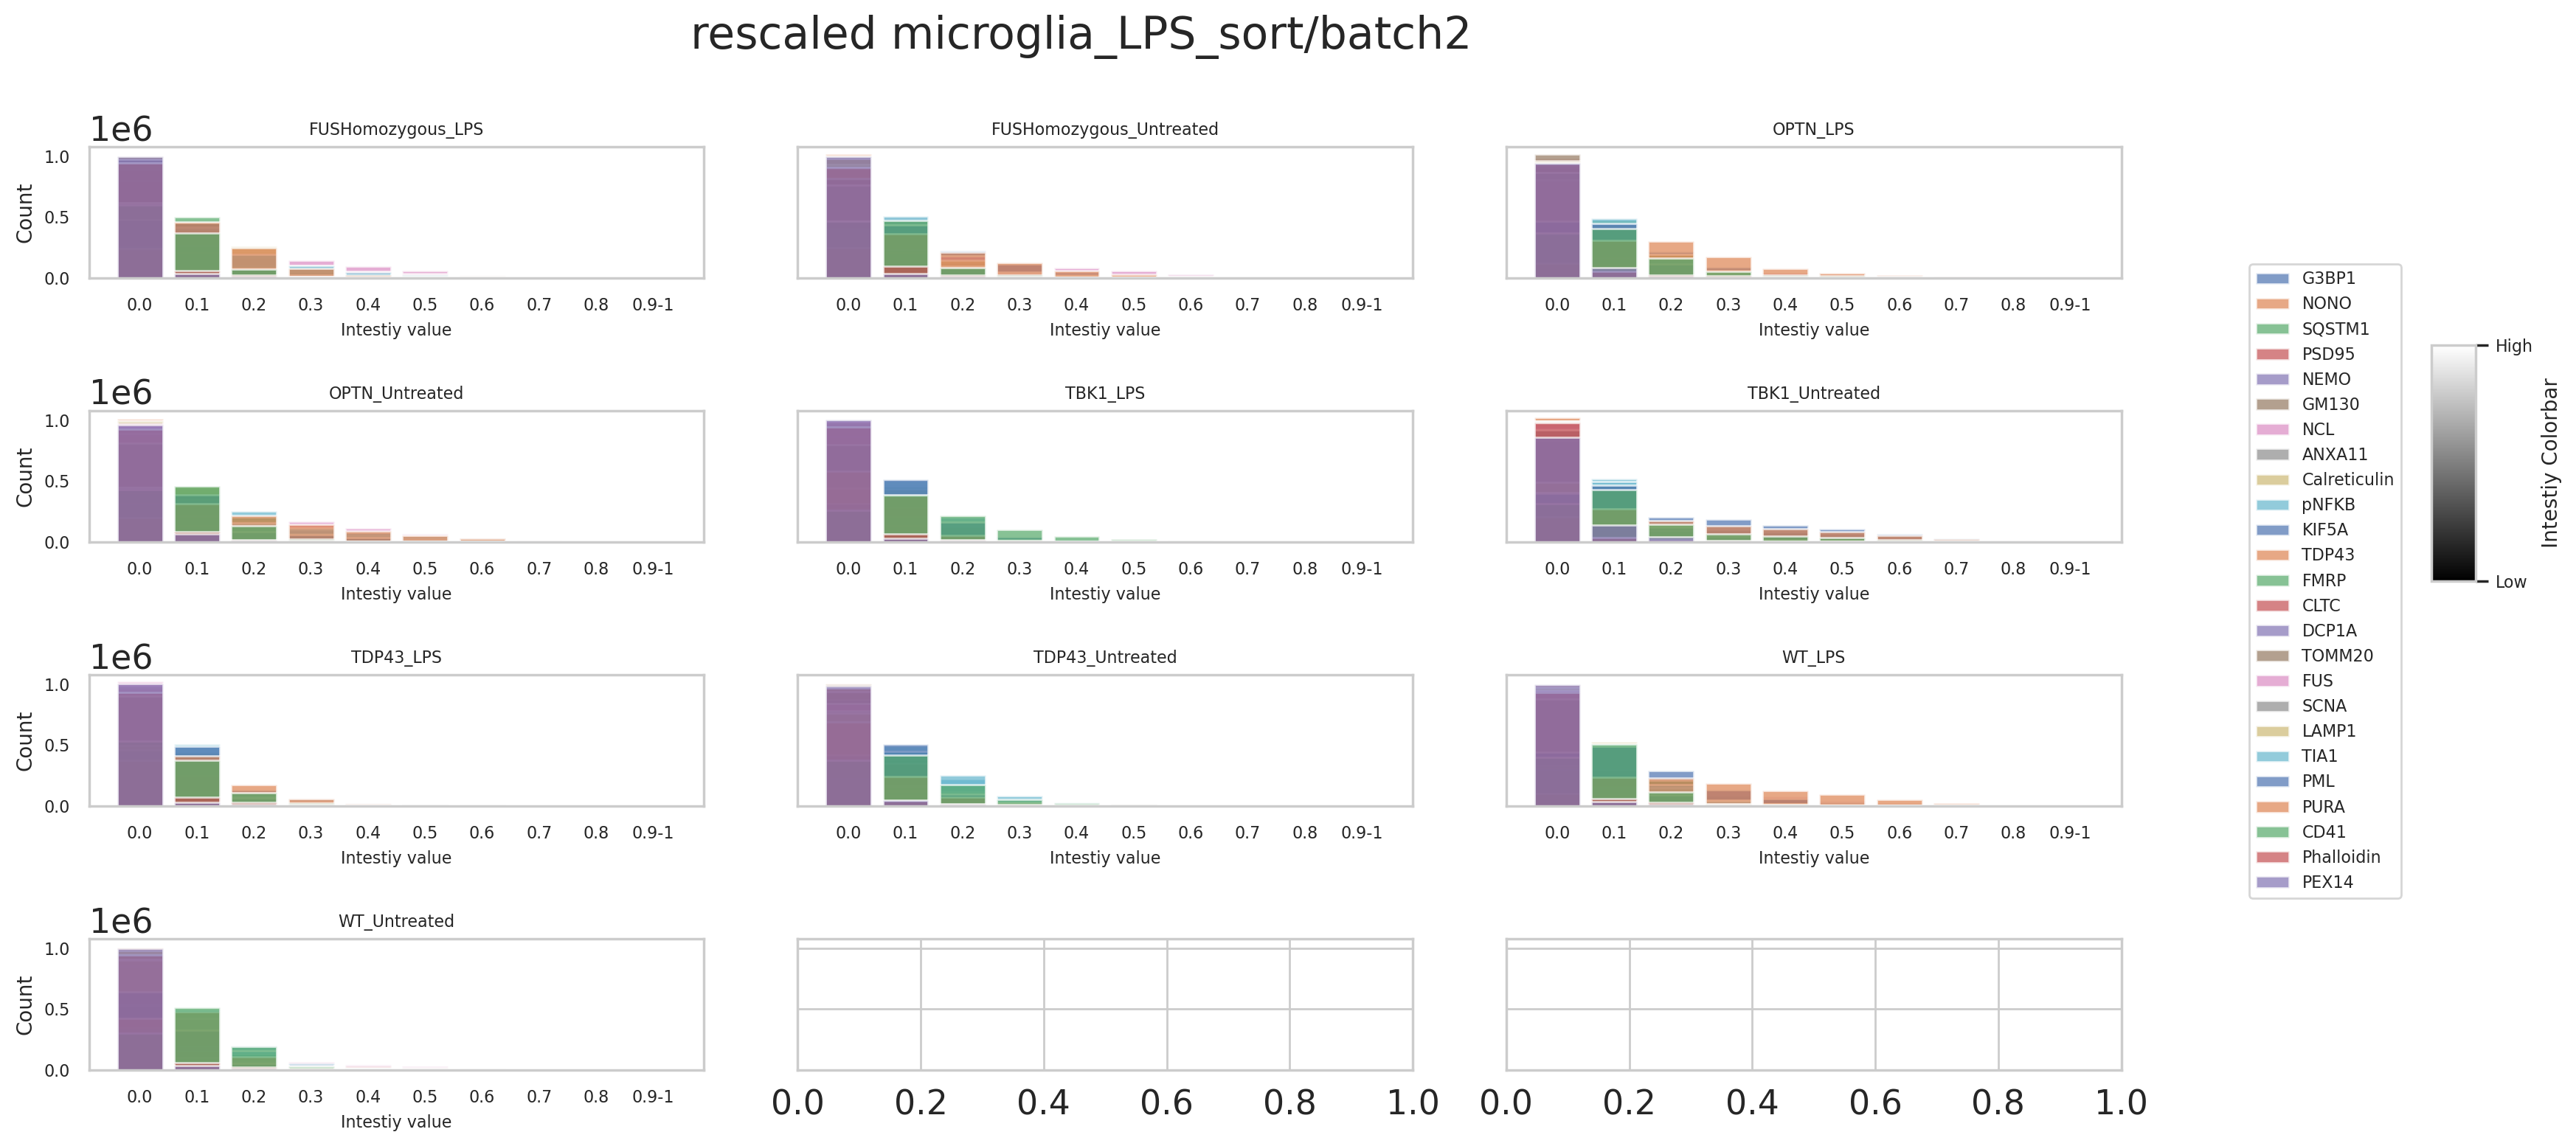

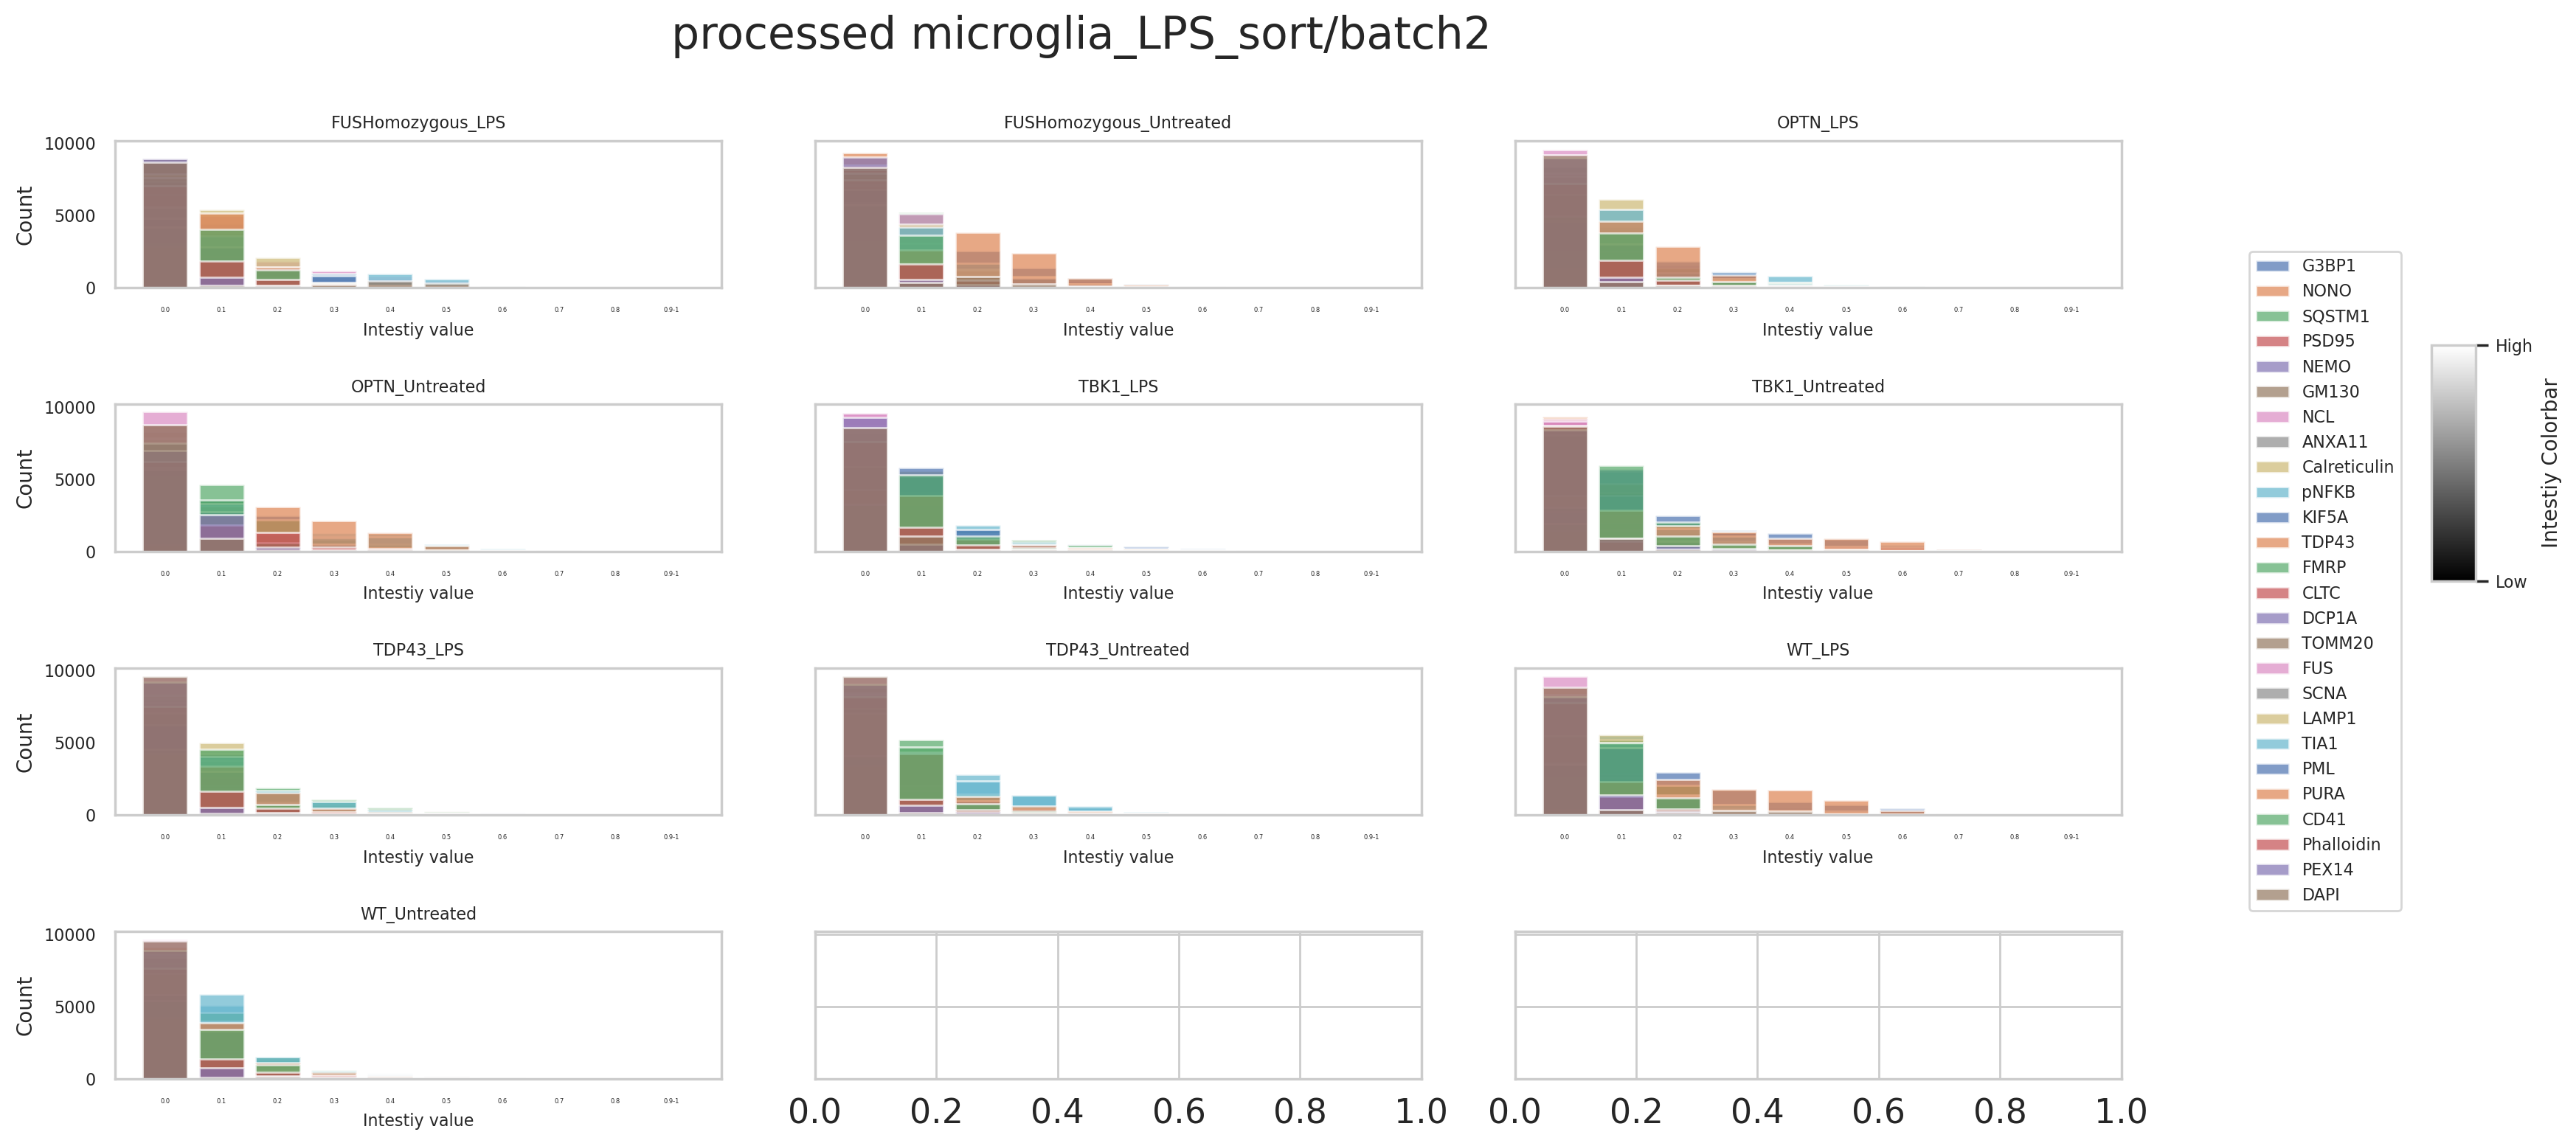

In [18]:
for batch in batches:
    print(batch)
    run_calc_hist_new(f'microglia_LPS_sort/{batch}',microglia_LPS_cell_lines_for_disp,
                      microglia_LPS_markers,hist_sample=10,ncols=3, nrows=4,
                               cond_count=2, rep_count=len(reps),
                             sample_size_per_markers=200)
    print("="*30)

In [52]:
# save notebook as HTML ( the HTML will be saved in the same folder the original script is)
from IPython.display import display, Javascript
display(Javascript('IPython.notebook.save_checkpoint();'))
os.system('jupyter nbconvert --to html src/preprocessing/notebooks/cell_count_stats_analysis_microglia_LPS.ipynb')

<IPython.core.display.Javascript object>

[NbConvertApp] Converting notebook src/preprocessing/notebooks/cell_count_stats_analysis_microglia_LPS.ipynb to html
[NbConvertApp] Writing 4790292 bytes to src/preprocessing/notebooks/cell_count_stats_analysis_microglia_LPS.html


0